# Desafío N° 1 
## 1 - Objetivo del Desafío:  Limpieza de Datos Dataset Properati.

### Grupo N° 5

    Integrantes:
                Arangue, Marcelo            
                Bardauil, Joaquín              
                Marquez, Hector              
                Neustadt, Alejandro       
                Pero, Felipe                                    


## Definición de la estrategia de limpieza:

                1. Identificar variables irrelevantes para eliminarlas del dataset, empezando desde lo más relevante
                   y finalizando en lo más detallado.
                2. Manejo de datos faltantes/perdidos.
                3. Estandarización de los datos.
    

## Obtención de los datos y librerías necesarias.

In [1]:
# Importamos las librerías que usaremos durante la limpieza:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from IPython.display import display

In [2]:
# Importamos el dataset y nombramos al objeto "df_properatti"
df_properatti = pd.read_csv("properatti.csv")

## 1. Relevamiento inicial y diagnóstico del estado del dataset

In [3]:
# Conocemos cual es el tamaño del dataset
df_properatti.shape

(121220, 26)

In [4]:
# Explorando los datos
type(df_properatti)

pandas.core.frame.DataFrame

In [5]:
# Vemos el contenido del dataset, para ello generamos una muestra aleatoria de 20 elementos
df_properatti.sample(20)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
89029,89029,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9324523,-60.6484233",-32.932452,...,135.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1b84j_venta_depart...,Amplio de categoría. Cuenta con dos puertas bl...,"Rivadavia 2000, categoria amoblado.",https://thumbs4.properati.com/8/75laJpv11qz1j6...
117636,117636,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NaN,3040.677966,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cdrv_venta_depart...,Edificio en construcc...,Departamento - Belgrano,https://thumbs4.properati.com/1/LE1rZXeBnjL6C9...
61321,61321,sell,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,"-31.3340572,-64.304966",-31.334057,...,138.0,266.666667,1159.420290,NaN,NaN,NaN,http://www.properati.com.ar/1a582_venta_casa_c...,"Barrio cerrado EL RODEO, sobre intercountry, p...",CASA EN VENTA,https://thumbs4.properati.com/1/vu4MJrE2VZ-_Pt...
44561,44561,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,...,165.0,555.555556,1212.121212,NaN,NaN,NaN,http://www.properati.com.ar/190ve_venta_depart...,"En venta 4 Duplex en Zona Sur, complejo Chacra...","Complejo Chacras del Sur- 3 Dormitorios, 3 baños.",https://thumbs4.properati.com/6/SbAUvfYOLtcw4B...
65321,65321,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,...,485.0,4168.224299,4597.938144,NaN,NaN,NaN,http://www.properati.com.ar/1ac4o_venta_casa_t...,DESCRIPCIÓN: Lindisima casa situada en el mas ...,"Albanueva. Increíble casa, se vende totalmente...",https://thumbs4.properati.com/5/vrB-LjysnI4gmW...
43383,43383,sell,apartment,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,Buenos Aires Costa Atlántica,3427431.0,"-37.277348,-56.983375",-37.277348,...,60.0,NaN,1150.000000,NaN,3.0,NaN,http://www.properati.com.ar/18ye1_venta_depart...,Corredor Responsable: Daniel Aibe - CMCPD 1155...,Depto 3 amb c/cochera 2do.Piso p/ascensor. Gesell,https://thumbs4.properati.com/3/Bx2Suz56PgYMFu...
17792,17792,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,3427458.0,"-34.597713,-58.445377",-34.597713,...,131.0,NaN,2950.381679,301.0,4.0,NaN,http://www.properati.com.ar/172w8_venta_depart...,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento 4 ambientes c/dep en pozo V. Crespo,https://thumbs4.properati.com/3/XMBGSHBYHXO1Q8...
94319,94319,sell,apartment,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430310.0,NaN,NaN,...,75.0,3066.666667,3066.666667,NaN,NaN,NaN,http://www.properati.com.ar/1bfeb_venta_depart...,Semipiso en pozo. 1 dormitorio + escritorio (p...,Edificio a estrenar | Punto Norte | Felix de A...,https://thumbs4.properati.com/5/v6-ibcDW3E0XVc...
27163,27163,sell,apartment,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,NaN,NaN,NaN,...,30.0,1833.333333,1833.333333,1.0,1.0,150.0,http://www.properati.com.ar/17sfg_venta_depart...,DEPARTAMENTO DE 1 AMBIENTE EN VENTAUBICADO AL ...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/hvBoVSWW3tu2bk...
57432,57432,sell,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.622343,-60.714245",-31.622343,...,NaN,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/19td8_venta_depart...,Corredor Responsable: Caroline Hogner - CCI St...,Departamento Interno,https://thumbs4.properati.com/7/Bs18OYt8ak2suN...


In [6]:
df_properatti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [7]:
# Verificamos la existencia de valores nulos, los contamos y los indexamos en orden ascendente:
# df_properatti.isnull().sum().sort_values()

# Tambien podemos usar la funcion np.sum(df_properatti.isnull()).sort_values(ascending=False), en esta caso es descendente

In [8]:
def describe_nulls(dataframe):
    # primero almaceno los valores de cantidad de nulos y cantidad de datos completos en dos variables
    print('Cantidad de nulos por columna')
    print('\n')
    nulos = dataframe.isnull().sum().sort_values()
    print(nulos)
    print('\n')
    completos = dataframe.notnull().sum().sort_values().reindex(nulos.index)
    #tener en cuenta que el índice de 'completos' será el mismo que el de nulos.

    # luego, defino los valores que van a tomar los ejes
    ejex = np.arange(len(nulos)) # el eje x va a tener 26 valores que corresponden a cada una de las variables del df
    ejey1 = nulos.values # el eje y para el gráfico 1, tomara cantidad de nulos por columnas
    ejey2 = completos.values # el eje y para el gráfico 2, tomará cantidad de datos completos por columna

    # inicializo el gráfico.
    # no hago 'fig, ax = plt.subplots()' porque en la manera que lo hago puedo definir el tamaño del gráfico
    # el tamaño del gráfico estará en figsize
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)

    #ploteo los valores
    grafico1 = ax.bar(x=ejex, height=ejey1, #es decir, el gráfico 1 ploteará los valores nulos
                      color='r', 
                      width=.65)
    grafico2 = ax.bar(x=ejex, height=ejey2, # el gráfico 2 ploteará los valores completos
                      color='g', 
                      bottom=ejey1, 
                      width=.65, 
                      alpha=0.5)

    # luego establezco las leyendas del gráfico.
    plt.xticks(ticks=ejex, labels=nulos.index, rotation=80, fontsize=15) # asignarle a cada punto sobre el eje x
    # el valor correspondiente en los indices de la serie de nulos.
    # plt.xticks es gracias a lo que en el eje x me quedan los nombres de las columnas
    plt.ylabel('Cantidad de nulos', fontsize=20)
    plt.xlabel('Variable', fontsize=20)
    plt.title('Porcentaje de nulos por columna', fontsize=20)
    plt.legend((grafico2, grafico1), ('Completos', 'Nulos'), fontsize=20)

    #por último, para cada una de las barras del gráfico, quiero que me diga 
    #cuál es el porcentaje del valor con respecto al total
    for rect in grafico1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '{0:d}%'.format(int((height*100)/len(dataframe))), 
                 ha='center', va='bottom', fontsize=13)
        
    print('\n')
    
    cant_nulos = nulos.sum()
    cant_compls = dataframe.count().sum()
    labels = ['Cantidad nulos', 'Cantidad completos']
    values = [cant_nulos, cant_compls]

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.set(title='Porcentaje total de nulos')
    grafico = ax.pie(values,labels=labels,colors=['r','g'], autopct='%1.1f%%', shadow=True)

Cantidad de nulos por columna


Unnamed: 0                         0
operation                          0
property_type                      0
place_with_parent_names            0
country_name                       0
state_name                         0
properati_url                      0
title                              0
description                        2
place_name                        23
image_thumbnail                 3112
geonames_id                    18717
surface_covered_in_m2          19907
price                          20410
price_aprox_local_currency     20410
price_aprox_usd                20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lat                            51550
lat-lon                        51550
lon                            51550
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype:

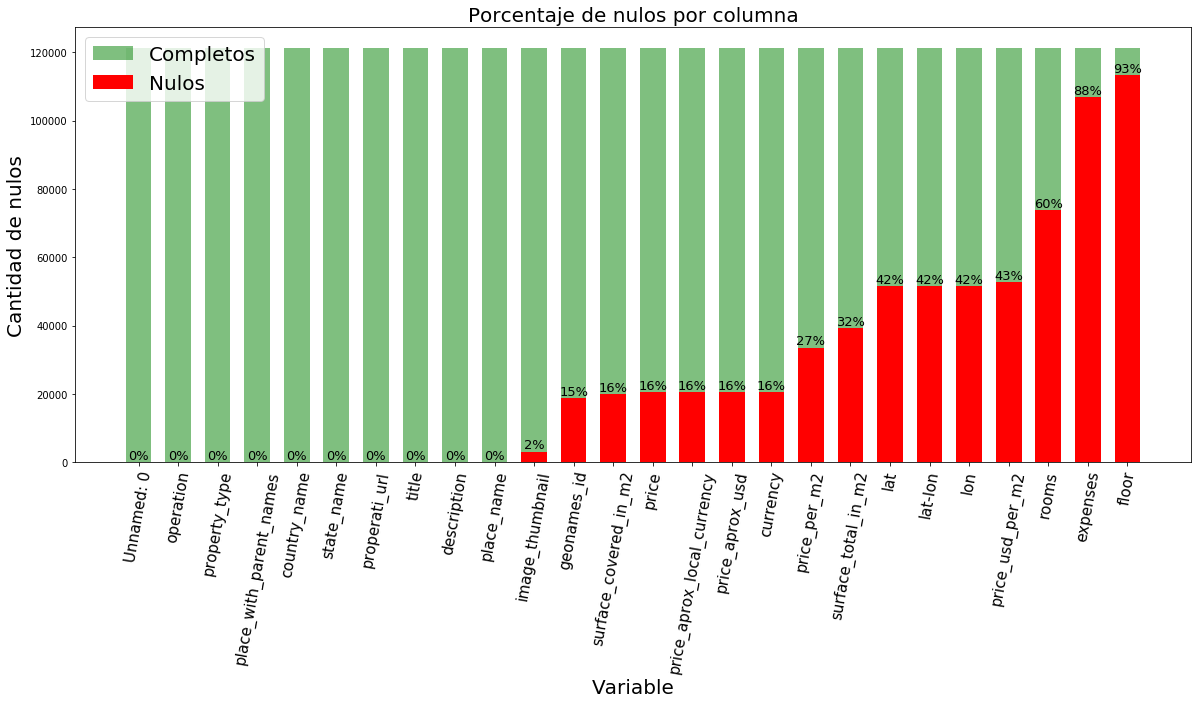

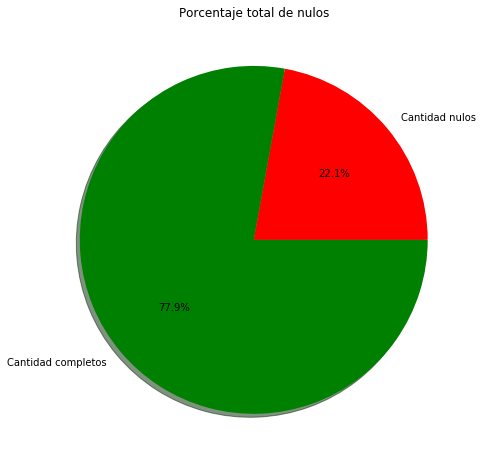

In [9]:
describe_nulls(df_properatti)

In [10]:
# Tipos de datos
df_properatti.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [11]:
# Revisamos las columnas del dataframe para reagruparlas por similitud temática:
df_properatti.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [12]:
# Para determinar las columnas irrelevantes o redundantes, evaluamos la diversidad de datos contenidos en ellas:
df_properatti.nunique().sort_values(ascending=True)

operation                          1
country_name                       1
currency                           4
property_type                      4
state_name                        28
rooms                             31
floor                            182
geonames_id                      646
expenses                         982
surface_covered_in_m2            995
place_name                      1060
place_with_parent_names         1164
surface_total_in_m2             1687
price                           9746
price_aprox_usd                10364
price_aprox_local_currency     10364
price_per_m2                   25185
price_usd_per_m2               25567
lat                            46495
lon                            46522
lat-lon                        47203
title                          72705
description                   104055
image_thumbnail               114389
properati_url                 121220
Unnamed: 0                    121220
dtype: int64

In [13]:
# Saco el indice afuera para hacer la cuenta que demuestre que el orden es el indice son iguales y tengo una columna de mas
a = df_properatti['Unnamed: 0']
b = df_properatti['operation'].index
c = a == b
c.all()

True

In [14]:
# Eliminamos las columnas que no tienen diversidad.

# operation: por solo "Sell"
# country_name: por solo "Argentina"
# properati_url y image_thumbnail por considerarlas irrelevantes por lo menos en este analisis, a futuro evaluando capacidad
# de visualizacion de imagenes o conexion a web, se puede reveer decision, idem si se expande el negocio a otros paises o
# no solo se tiene en cuenta la venta, sino tambien el posible alquiler de la propiedad.

df_properatti.drop(['Unnamed: 0','operation', 'country_name', 'properati_url', 'image_thumbnail'], axis=1, inplace=True)


In [15]:
# Ahora reordenamos las columnas por similitud temática:
        
df_properatti = df_properatti.reindex(columns=['property_type','title','description', 'surface_total_in_m2',
                         'surface_covered_in_m2','rooms','floor','price_aprox_usd', 'price_usd_per_m2', 'price_per_m2',
                         'price', 'currency', 'price_aprox_local_currency', 'expenses', 'state_name', 
                         'place_with_parent_names','place_name', 'geonames_id', 'lat-lon', 'lat', 'lon'])

## 2. Limpieza de Datos

### Limpieza, análisis y rellenado de datos referentes a localizaciones de las propiedades.

In [16]:
# Analizaremos los place nulos, para ver que datos hay
df_properatti.loc[df_properatti['place_name'].isnull()]

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,currency,price_aprox_local_currency,expenses,state_name,place_with_parent_names,place_name,geonames_id,lat-lon,lat,lon
6489,house,Venta de casa en Santa María de Tigre,"Espectacular casa moderna de una planta, con a...",240.0,240.0,NaN,NaN,650000.0,2708.333333,2708.333333,...,USD,11468925.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098
10201,house,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,Corredor Responsable: SABRINA COCCONI - CSI 62...,NaN,300.0,5.0,NaN,535000.0,NaN,1783.333333,...,USD,9439807.5,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.400704,-58.638067",-34.400704,-58.638067
11451,house,SANTA MARIA DE TIGRE IMPECABLE,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,2170.0,270.0,NaN,NaN,550000.0,253.456221,2037.037037,...,USD,9704475.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261
14839,house,Venta de casa en Santa María de Tigre,Muy linda casa de estilo clásico.-Planta baja;...,240.0,200.0,NaN,NaN,480000.0,2000.000000,2400.000000,...,USD,8469360.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174
18622,house,Casa con increible vista al lago con playa y m...,Casa con increible vista al lago con playa de...,340.0,340.0,NaN,NaN,1297000.0,3814.705882,3814.705882,...,USD,22884916.5,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350
21922,house,Venta Casa - Barrio Santa Maria de Tigre,Corredor Responsable: Matias Castelli - CUCICB...,NaN,220.0,5.0,NaN,440000.0,NaN,2000.000000,...,USD,7763580.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.399704,-58.638405",-34.399704,-58.638405
23664,house,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,EXCELENTE CASA CLASICA con grandes ventanas y ...,294.0,294.0,NaN,NaN,480000.0,1632.653061,1632.653061,...,USD,8469360.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800
24722,house,Venta de casa en Santa María de Tigre,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",316.0,270.0,NaN,NaN,530000.0,1677.215190,1962.962963,...,USD,9351585.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778
38856,house,"Casa (barrio cerrado), Venta",SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,NaN,550.0,NaN,NaN,1350000.0,NaN,2454.545455,...,USD,23820075.0,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659
45970,apartment,Excelente monoambiente. Barrio El Palmar. Con...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",55.0,27.0,1.0,NaN,95000.0,1727.272727,3518.518519,...,USD,1676227.5,NaN,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,NaN,NaN,"-34.396074,-58.63738",-34.396074,-58.637380


In [17]:
# Todos los place null son de Tigre?? si, viendo la base porque son solo 23 filas; entonces generamos un check con mascaras
mask1 = df_properatti['place_name'].isnull()
mask2 = df_properatti['place_with_parent_names'] == "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||"
indices = mask1 == mask2

# Todos los registros en los que falta place_name son todos los registros con barrio Tigre.
# el método all() devuelve True cuando todos los elementos de una lista son True.

indices.all()

True

In [18]:
# Representaremos información relativa a la ubicación y ver de separar la columna "place_with_parent_names"

pattern = r'\|*([\w+\.*\s*]+)\|'
regex = re.compile(pattern, flags = re.IGNORECASE)

separa_list = []
for texto in df_properatti["place_with_parent_names"]:
    separa_list.append(regex.findall(texto))
    
separa_df = pd.DataFrame(separa_list)   
separa_df.sample(10)

,0,1,2,3,4
48128,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,None,None
2038,Argentina,Buenos Aires Costa Atlántica,Mar de Ajó,None,None
39049,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,None
96107,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Florida,None
18894,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,None,None
119308,Argentina,Capital Federal,Boedo,None,None
117434,Argentina,Santa Fe,Rosario,None,None
97947,Argentina,Córdoba,Córdoba,None,None
105135,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,None,None
110875,Argentina,Capital Federal,Villa Devoto,None,None


In [19]:
df_properatti = pd.merge(df_properatti, separa_df, on = df_properatti.index)
df_properatti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 27 columns):
key_0                         121220 non-null int64
property_type                 121220 non-null object
title                         121220 non-null object
description                   121218 non-null object
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
rooms                         47390 non-null float64
floor                         7899 non-null float64
price_aprox_usd               100810 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
expenses                      14262 non-null float64
state_name                    121220 non-null object
place_with_parent_names       121220 no

In [20]:
# Volvemos a chequear si la columna key_o es como la definida antes Unnamed: 0 y si es, la borramos
d = df_properatti['key_0']
# Saco el indice afuera para hacer la cuenta que demuestre que el orden es el indice son iguales y tengo una columna de mas
e = df_properatti["state_name"].index
f = d == e
f.all()

True

In [21]:
df_properatti = df_properatti.rename(columns = {0:'pais',1:'provincia/zona',2:'ciudad',3:'barrio',4:'lugar'})

In [22]:
pd.unique(df_properatti['pais'])

array(['Argentina'], dtype=object)

In [23]:
df_properatti['pais'].nunique()

1

Entonces con la misma idea anterior de limpieza, borraremos a 'key_0' y 'pais' Idem, para el campo compuesto de 'place_with_parent_names' que ya lo abri en campos individuales

In [24]:
df_properatti.drop(['key_0','pais', 'place_with_parent_names'], axis=1, inplace=True)

df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'place_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'provincia/zona', 'ciudad',
       'barrio', 'lugar'],
      dtype='object')

In [25]:
df_properatti['place_name'][mask1]

6489     NaN
10201    NaN
11451    NaN
14839    NaN
18622    NaN
21922    NaN
23664    NaN
24722    NaN
38856    NaN
45970    NaN
46642    NaN
53130    NaN
55306    NaN
57703    NaN
57759    NaN
57764    NaN
57793    NaN
58004    NaN
58037    NaN
59069    NaN
62411    NaN
62413    NaN
63849    NaN
Name: place_name, dtype: object

In [26]:
# Intentare reemplazar los valores nulos de place_name por los de ciudad
# lo hice, pero entiendo por el cartel que debe haber una manera mejor

# df_properatti['place_name'][mask1] = df_properatti['ciudad'][mask1]
# df_properatti['place_name'][mask1]

df_properatti.place_name[mask1] = df_properatti.ciudad[mask1]
df_properatti.place_name[mask1]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


6489     Tigre
10201    Tigre
11451    Tigre
14839    Tigre
18622    Tigre
21922    Tigre
23664    Tigre
24722    Tigre
38856    Tigre
45970    Tigre
46642    Tigre
53130    Tigre
55306    Tigre
57703    Tigre
57759    Tigre
57764    Tigre
57793    Tigre
58004    Tigre
58037    Tigre
59069    Tigre
62411    Tigre
62413    Tigre
63849    Tigre
Name: place_name, dtype: object

In [27]:
# Chequeo si quedo completo, place_name
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
provincia/zona                     0
place_name                         0
state_name                         0
description                        2
ciudad                          4780
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price                          20410
price_aprox_local_currency     20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lat-lon                        51550
lat                            51550
lon                            51550
price_usd_per_m2               52603
rooms                          73830
barrio                         80915
expenses                      106958
floor                         113321
lugar                         120672
dtype: int64

In [28]:
df_properatti.shape

(121220, 24)

#### Analizamos otros campos relacionados con la localidad y las ubicaciones

In [29]:
df_properatti['provincia/zona'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [30]:
# Intuyo que las columnas 'provincia/zona' y 'state_name'son iguales y si es asi, borrare una
g = df_properatti['provincia/zona']
h = df_properatti["state_name"]
i = g == h
i.all()

True

In [31]:
# Entonces borarremos la columna 'provincia/zona'

df_properatti.drop('provincia/zona', axis=1, inplace=True)

df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'place_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar'],
      dtype='object')

In [32]:
# Chequeamos lo mismo para las columnas 'place_name' y 'ciudad'
# Intuyo que las columnas 'place_name' y 'ciudad'son iguales y si es asi, borrare una
j = df_properatti['place_name']
k = df_properatti["ciudad"]
l = j == k
l.all()
# Entonces analizaremos que hay en la columna 'ciudad', ya que la intuicion no fue valida

False

In [33]:
# Voy a chequear si el conjunto mask_city esta incluido dentro de mask_otras y esto es porque en place_name hay info
# que creo que deberia estar en barrio y lugar; entonces a la larga sacar columna place_name
mask_city = df_properatti['place_name'] != df_properatti['ciudad']
mask_city.value_counts()

False    85823
True     35397
dtype: int64

In [34]:
mask_otras = (df_properatti['place_name'] == df_properatti['barrio']) | (df_properatti['place_name'] == df_properatti['lugar'])
mask_otras.value_counts()

False    81049
True     40171
dtype: int64

In [35]:
# Este analisis de conjuntos es para demostrar que mask_city esta contenida totalmente dentro de mask_otras
set(mask_city) & set(mask_otras) == set(mask_city)

True

In [36]:
# Como esta contenida mask_city, puedo ver que los nulos en ciudad igualarlos al dato del place_name en este conjunto
no_mask_city = df_properatti['ciudad'].isnull()
df_properatti['place_name'][no_mask_city]

108              Capital Federal
110              Capital Federal
115              Capital Federal
119              Capital Federal
121              Capital Federal
125       Bs.As. G.B.A. Zona Sur
201                     Santa Fe
311              Capital Federal
315              Capital Federal
316              Capital Federal
317              Capital Federal
326              Capital Federal
433        Buenos Aires Interior
503              Capital Federal
506              Capital Federal
507              Capital Federal
514              Capital Federal
518              Capital Federal
524              Capital Federal
664        Buenos Aires Interior
842              Capital Federal
845              Capital Federal
846              Capital Federal
897        Buenos Aires Interior
901              Capital Federal
902                      Tucumán
919                     Santa Fe
1011                     Córdoba
1022       Buenos Aires Interior
1023                     Córdoba
          

In [37]:
# Reemplazo los nulos de la ciudad por los de place_name
df_properatti.ciudad[no_mask_city] = df_properatti.place_name[no_mask_city]
df_properatti.ciudad[no_mask_city]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


108              Capital Federal
110              Capital Federal
115              Capital Federal
119              Capital Federal
121              Capital Federal
125       Bs.As. G.B.A. Zona Sur
201                     Santa Fe
311              Capital Federal
315              Capital Federal
316              Capital Federal
317              Capital Federal
326              Capital Federal
433        Buenos Aires Interior
503              Capital Federal
506              Capital Federal
507              Capital Federal
514              Capital Federal
518              Capital Federal
524              Capital Federal
664        Buenos Aires Interior
842              Capital Federal
845              Capital Federal
846              Capital Federal
897        Buenos Aires Interior
901              Capital Federal
902                      Tucumán
919                     Santa Fe
1011                     Córdoba
1022       Buenos Aires Interior
1023                     Córdoba
          

In [38]:
# Chequeo si quedo en cero ciudad. OK!!
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
ciudad                             0
place_name                         0
state_name                         0
description                        2
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lat-lon                        51550
lat                            51550
lon                            51550
price_usd_per_m2               52603
rooms                          73830
barrio                         80915
expenses                      106958
floor                         113321
lugar                         120672
dtype: int64

In [39]:
# Veo que tengo en la base para estos campos, donde buscare asignar datos a barrio y lugar desde place_name
df_properatti[['ciudad','place_name','barrio','lugar']].sample(50)

,ciudad,place_name,barrio,lugar
55597,Nuñez,Nuñez,None,None
116346,Moreno,Moreno,Moreno,None
55750,Villa Carlos Paz,Villa Carlos Paz,None,None
33491,La Plata,La Plata,La Plata,None
1964,Moreno,Moreno,None,None
118154,Córdoba,Córdoba,None,None
28912,Boedo,Boedo,None,None
13456,Liniers,Liniers,None,None
8598,Rosario,Rosario,None,None
115776,Córdoba,Córdoba,None,None


In [40]:
# Intuyo que si el 'barrio' == 'Nordelta', se cumple que 'place_name' == 'lugar', siempre y cuando que en 
# 'place_name' no sea 'Nordelta', porque en ese caso el 'lugar' esta nulo, entonces lo transformare luego en 'Nordelta'

mask22 = df_properatti['barrio'] == "Nordelta"
m = df_properatti['place_name'][mask22] == "Nordelta"
n = df_properatti['lugar'][mask22].isnull()
o = m == n
o.all()

True

In [41]:
mask22 = (df_properatti['barrio'] == "Nordelta") & (df_properatti['lugar'].isnull())
df_properatti.lugar[mask22] = "Nordelta"
df_properatti.lugar[mask22]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


104       Nordelta
234       Nordelta
324       Nordelta
408       Nordelta
415       Nordelta
418       Nordelta
512       Nordelta
571       Nordelta
572       Nordelta
574       Nordelta
575       Nordelta
576       Nordelta
577       Nordelta
578       Nordelta
579       Nordelta
580       Nordelta
585       Nordelta
586       Nordelta
587       Nordelta
589       Nordelta
594       Nordelta
597       Nordelta
598       Nordelta
599       Nordelta
600       Nordelta
602       Nordelta
603       Nordelta
605       Nordelta
614       Nordelta
617       Nordelta
            ...   
116149    Nordelta
116194    Nordelta
116947    Nordelta
116996    Nordelta
117012    Nordelta
117331    Nordelta
117810    Nordelta
117811    Nordelta
117855    Nordelta
117954    Nordelta
118165    Nordelta
118316    Nordelta
118475    Nordelta
118488    Nordelta
118506    Nordelta
118533    Nordelta
118919    Nordelta
118948    Nordelta
119079    Nordelta
119100    Nordelta
119203    Nordelta
119304    No

In [42]:
# Rarezas de la base para que se entienda mejor ciudad-barrio
mask_centro = df_properatti['place_name'] == "Centro / Microcentro"
# mask_centro = (df_properatti.ciudad=='Microcentro')
mask_centro.sum()

223

In [43]:
df_properatti.ciudad[mask_centro] = 'Capital Federal'

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_properatti.place_name[mask_centro] = 'Centro'

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_properatti.barrio[mask_centro] = 'Centro'

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_properatti.lugar[mask_centro] = 'Microcentro'

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
# En la base se ve que las columnas 'place_name' y 'barrio' o lugar coinciden varias veces, ahora llevare el valor de
# place_name a lugar
mask_barrio = (df_properatti['place_name'] != df_properatti['barrio']) & (df_properatti['place_name'] != df_properatti['ciudad'])
mask_barrio.value_counts()

False    120422
True        798
dtype: int64

In [48]:
df_properatti.lugar[mask_barrio].value_counts()

Barrio Los Alisos            278
Barrio La Alameda             62
BarrioPortezuelo              54
Barrio Los Lagos              39
Barrio El Golf                32
Enyoi                         17
Barrio Los Castores           14
QBay Yacht                    13
Barrio Las Glorietas          10
Barrio La Isla                10
Islas del Canal                6
Barrio Los Sauces              4
Barrio Barrancas del Lago      4
Barrio Cabos del Lago          3
Barrio El Yacht                1
Barrio Los Tilos               1
Name: lugar, dtype: int64

In [49]:
df_properatti.lugar[mask_barrio].count()

548

In [50]:
df_properatti.lugar[mask_barrio].isnull().sum()

250

In [51]:
# Dentro de esta condicion hay 548 definidos y (798 - 548) = 250 que reemplazaremos por el valor del place_name en lugar
lugar_definido = (df_properatti.lugar[mask_barrio] != 'NaN')
set(lugar_definido) & set(mask_barrio)

{True}

In [52]:
# Chequeo si la mascara representa los 250 faltantes
mask_no_barrio_num = df_properatti.lugar[mask_barrio].isnull().sum()
mask_no_barrio_num

250

In [53]:
mask_no_barrio = (df_properatti.lugar[mask_barrio].isnull())
mask_no_barrio

17        False
33        False
278       False
416       False
446       False
581       False
584       False
596       False
615       False
616       False
619       False
622       False
1002       True
1122      False
1124      False
1127      False
1130      False
1132      False
1146      False
1147      False
1149      False
1198      False
1201      False
1228      False
1229      False
1282      False
1283      False
1284      False
1285      False
1286      False
          ...  
113473    False
113474    False
113475    False
113476    False
113553    False
113994    False
114011     True
114051    False
114089    False
114322     True
114379    False
114415    False
114425    False
114430    False
114474     True
116193    False
116198     True
116368     True
116903    False
116913     True
116962    False
116969    False
116984    False
117011    False
117164     True
118210    False
118841    False
119583    False
119908     True
120156    False
Name: lugar, Length: 798

In [54]:
# Despues de varias pruebas, salio asi, pudiendo destrabar el index bolean

df_properatti.place_name.loc[mask_no_barrio.index]

17                               Barrio El Golf
33                               Barrio El Golf
278                        Barrio Las Glorietas
416                            Barrio Los Lagos
446                        Barrio Las Glorietas
581                                       Enyoi
584                                       Enyoi
596                                  QBay Yacht
615                           Barrio La Alameda
616                                  QBay Yacht
619                             Islas del Canal
622                             Islas del Canal
1002      Barrio Cerrado "La Cautiva del Pilar"
1122                          Barrio La Alameda
1124                          Barrio Los Alisos
1127                          Barrio Los Alisos
1130                          Barrio Los Alisos
1132                          Barrio Los Alisos
1146                          Barrio Los Alisos
1147                          Barrio Los Alisos
1149                          Barrio Los

In [55]:
# Antes de proceder al renombrar, chequeo si sale bien tambien en lugar y si hay coincidencias.
df_properatti.lugar.loc[mask_no_barrio.index]

17                   Barrio El Golf
33                   Barrio El Golf
278            Barrio Las Glorietas
416                Barrio Los Lagos
446            Barrio Las Glorietas
581                           Enyoi
584                           Enyoi
596                      QBay Yacht
615               Barrio La Alameda
616                      QBay Yacht
619                 Islas del Canal
622                 Islas del Canal
1002                           None
1122              Barrio La Alameda
1124              Barrio Los Alisos
1127              Barrio Los Alisos
1130              Barrio Los Alisos
1132              Barrio Los Alisos
1146              Barrio Los Alisos
1147              Barrio Los Alisos
1149              Barrio Los Alisos
1198                 Barrio El Golf
1201                 Barrio El Golf
1228                Islas del Canal
1229                Islas del Canal
1282               BarrioPortezuelo
1283               BarrioPortezuelo
1284              Barrio Los

In [56]:
# la usare para reemplazar valores
# df_properatti.lugar = df_properatti.place_name[mask_no_barrio] (esta fue la idea original, que no andaba por el tema del bolean)
df_properatti.lugar.loc[mask_no_barrio.index] = df_properatti.place_name.loc[mask_no_barrio.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
# Estan todos completos
df_properatti.lugar[mask_barrio].count()

798

In [58]:
# Chequeo no falta ninguno
df_properatti.lugar[mask_barrio].isnull().sum()

0

In [59]:
# Chequeo como quedo
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
ciudad                             0
place_name                         0
state_name                         0
description                        2
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lat-lon                        51550
lat                            51550
lon                            51550
price_usd_per_m2               52603
rooms                          73830
barrio                         80692
expenses                      106958
floor                         113321
lugar                         116884
dtype: int64

In [60]:
# Veo que tengo
df_properatti[['ciudad','place_name','barrio','lugar']].sample(50)

,ciudad,place_name,barrio,lugar
2763,Catalinas,Catalinas,None,None
28084,Constitución,Constitución,None,None
23835,Buenos Aires Interior,Buenos Aires Interior,None,None
112100,Tres de Febrero,Caseros,Caseros,None
117345,Villa Urquiza,Villa Urquiza,None,None
21275,La Matanza,Ramos Mejía,Ramos Mejía,None
22501,Floresta,Floresta,None,None
70256,La Matanza,La Matanza,None,None
61107,Belgrano,Belgrano,None,None
55375,Tigre,Tigre,None,None


In [61]:
# Si el barrio esta nulo, copio en él, el place_name; luego idem para lugar copiando barrio si el lugar esta nulo.
# Asi terminamos de completar datos de ubicacion y borramos a posteriori place_name.
# Mas adelante se puede hacer un chequeo con los geopandas.
mask_barrio_vacio = df_properatti.barrio.isnull()

In [62]:
# Reemplazo barrio por place_name
df_properatti.barrio[mask_barrio_vacio] = df_properatti.place_name[mask_barrio_vacio]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
# Chequeo barrio
df_properatti.barrio.isnull().sum()

0

In [64]:
# Idem para lugar
mask_lugar_vacio = df_properatti.lugar.isnull()

In [65]:
df_properatti.lugar[mask_lugar_vacio] = df_properatti.barrio[mask_lugar_vacio]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
# Chequeo lugar
df_properatti.lugar.isnull().sum()

0

In [67]:
# Veo que tengo
df_properatti[['ciudad','place_name','barrio','lugar']].sample(50)

,ciudad,place_name,barrio,lugar
113681,Rosario,Rosario,Rosario,Rosario
40245,Mar del Plata,Mar del Plata,Mar del Plata,Mar del Plata
9468,Villa Urquiza,Villa Urquiza,Villa Urquiza,Villa Urquiza
22799,Morón,Castelar,Castelar,Castelar
22025,Caballito,Caballito,Caballito,Caballito
101743,Recoleta,Recoleta,Recoleta,Recoleta
57234,La Plata,La Plata,La Plata,La Plata
83934,San Isidro,Martínez,Martínez,Martínez
39027,Santa Fe,Santa Fe,Santa Fe,Santa Fe
13272,Córdoba,Córdoba,Córdoba,Córdoba


In [68]:
# Chequeo como quedo
df_properatti.isnull().sum().sort_values()

property_type                      0
ciudad                             0
place_name                         0
state_name                         0
barrio                             0
lugar                              0
title                              0
description                        2
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price                          20410
price_aprox_local_currency     20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lat-lon                        51550
lat                            51550
lon                            51550
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype: int64

In [69]:
# Entonces procedemos a borarr place_name
df_properatti.drop('place_name', axis=1, inplace=True)
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar'],
      dtype='object')

In [70]:
df_properatti.shape

(121220, 22)

## Normalización información relacionada con Geolocalización.

### Encontramos la base de datos de geonames, que contiene información de lugares, latitudes y longitudes y la descargamos para completar información faltante:

https://download.geonames.org/export/dump/

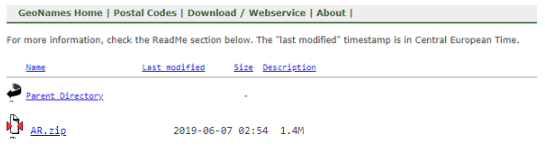

In [71]:
# Importamos el archivo de geolocalizaciones descargado
geo = pd.read_csv('AR.txt', header = None, sep="\t")

In [72]:
# Reviso la composición del archivo importado
geo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
1,3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
2,3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3,3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
4,3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [73]:
# Cambiamos el nombre de las columnas relevantes:
geo.rename(columns = {0:'geonameid',1:'name',4:'latitude',5:'longitude'}, inplace = True)

# Reducimos los valores decimales de latitud y longitud:
geo['latitude'] = pd.Series([round(val, 8) for val in geo['latitude']], index = geo.index)
geo['longitude'] = pd.Series([round(val, 8) for val in geo['longitude']], index = geo.index)

# Limpiamos el Dataframe de Geolocalizaciones eliminando las columnas que no contienen información relevante:
geo.drop([2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], axis=1, inplace=True)

In [74]:
geo.head()

,geonameid,name,latitude,longitude
0,3427200,Sierra del 15,-37.96613,-57.94670
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667
2,3427202,Cañada del Zorro,-32.16667,-59.50000
3,3427203,Estancia Zorraquín,-31.51553,-58.55208
4,3427204,Estancia Zequeira Cué,-28.43825,-56.08838


In [75]:
geo.info

<bound method DataFrame.info of        geonameid                       name  latitude  longitude
0        3427200              Sierra del 15 -37.96613  -57.94670
1        3427201      Puesto 1 Napoleón Cué -28.63333  -56.11667
2        3427202           Cañada del Zorro -32.16667  -59.50000
3        3427203         Estancia Zorraquín -31.51553  -58.55208
4        3427204      Estancia Zequeira Cué -28.43825  -56.08838
5        3427205            Arroyo Zequeira -27.83789  -56.08614
6        3427206         Zenón Videla Dorna -35.54257  -58.88620
7        3427207                 Zenón Roca -31.54366  -58.76864
8        3427208                     Zelaya -34.37014  -58.87109
9        3427209         Arroyo de la Zarza -32.13507  -59.85856
10       3427210                      Zarza -30.25772  -59.13549
11       3427211              Puesto Zárate -25.67826  -57.83351
12       3427212          Partido de Zárate -34.00000  -59.16667
13       3427213                     Zárate -34.09814  -59

In [76]:
# Antes de correr el proceso cuento la cantidad inicial de valores incompletos geonames_id:
df_properatti.geonames_id.notnull().value_counts()

True     102503
False     18717
Name: geonames_id, dtype: int64

In [77]:
# Antes de correr el proceso cuento la cantidad inicial de valores incompletos longitud:
df_properatti.lon.notnull().value_counts()

True     69670
False    51550
Name: lon, dtype: int64

In [78]:
# Antes de correr el proceso cuento la cantidad inicial de valores incompletos latitud:
df_properatti.lon.notnull().value_counts()

True     69670
False    51550
Name: lon, dtype: int64

In [79]:
# Aplicamos modelo para completar 'lat'

# Creamos un diccionario:
lat_d = {}
geoname_lat = zip(geo['geonameid'],geo['latitude'])

# Rellenamos
for geoname, latitud in geoname_lat:
    lat_d[geoname] = latitud

# Completamos
df_properatti.loc[df_properatti['lat'].isnull(),'lat'] = df_properatti['geonames_id'].map(lat_d)

In [80]:
# Aplicamos modelo para completar 'lon'

# Creamos un diccionario:
lon_d = {}
geoname_lon = zip(geo['geonameid'],geo['longitude'])

# Rellenamos
for geoname, longitud in geoname_lon:
    lon_d[geoname] = longitud

# Completamos    
df_properatti.loc[df_properatti['lon'].isnull(),'lon'] = df_properatti['geonames_id'].map(lon_d)

In [81]:
# Aplicamos modelo para completar 'lat-lon':

df_properatti.loc[(df_properatti['lat-lon'].isnull())|(df_properatti['lon'].notnull()),'lat-lon'] = df_properatti['lat'].astype(str)+','+df_properatti['lon'].astype(str)

In [82]:
# Buscamos donde hay nulos en geonames y no nulos en lat, lon
mask_geo = (df_properatti.geonames_id.isnull()) & (df_properatti.lat.notnull())
mask_geo.sum()

10532

In [83]:
df_properatti[['state_name','ciudad','barrio','lugar','geonames_id','lat','lon']][mask_geo].sample(20)

,state_name,ciudad,barrio,lugar,geonames_id,lat,lon
12854,Entre Ríos,Costa Uruguay Sur,Costa Uruguay Sur,Costa Uruguay Sur,NaN,-38.416097,-63.616672
57926,Bs.As. G.B.A. Zona Sur,Lanús,Lanús,Lanús,NaN,-34.699568,-58.428106
59564,Bs.As. G.B.A. Zona Sur,Lanús,Lanús,Lanús,NaN,-34.711473,-58.406346
32123,Bs.As. G.B.A. Zona Norte,Tigre,Nordelta,Nordelta,NaN,-34.415091,-58.639440
62921,Bs.As. G.B.A. Zona Norte,Tigre,Tigre,Tigre,NaN,-34.426645,-58.575882
75647,Bs.As. G.B.A. Zona Norte,Tigre,Tigre,Tigre,NaN,-34.423533,-58.590304
113111,Bs.As. G.B.A. Zona Oeste,La Matanza,La Tablada,La Tablada,NaN,-34.689050,-58.543263
110253,Bs.As. G.B.A. Zona Sur,Presidente Perón,Guernica,Guernica,NaN,-34.898565,-58.341530
9941,Capital Federal,Las Cañitas,Las Cañitas,Las Cañitas,NaN,-34.567972,-58.433150
50308,Bs.As. G.B.A. Zona Norte,San Isidro,Boulogne Sur Mer,Boulogne Sur Mer,NaN,-34.494426,-58.559940


In [84]:
# Chequeos en la base los nulos en lat
mask_lat = df_properatti.lat.isnull()

In [85]:
# Aca chequeo un campo para ver si funciono la asignacion
df_properatti.loc[13]

property_type                                                         apartment
title                                                           Vitraux Palermo
description                    Torre I Mondrian. 3 ambientes con terraza y d...
surface_total_in_m2                                                          50
surface_covered_in_m2                                                        30
rooms                                                                         1
floor                                                                       NaN
price_aprox_usd                                                          111700
price_usd_per_m2                                                           2234
price_per_m2                                                            3723.33
price                                                                    111700
currency                                                                    USD
price_aprox_local_currency              

In [86]:
# Agregamos una columna (lat-lon) en base de geonames para completar geonames_id en DF:
geo['lat_lon'] = geo['latitude'].astype(str)+','+geo['longitude'].astype(str)
geo.head()

,geonameid,name,latitude,longitude,lat_lon
0,3427200,Sierra del 15,-37.96613,-57.94670,"-37.96613,-57.9467"
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667,"-28.63333,-56.11667"
2,3427202,Cañada del Zorro,-32.16667,-59.50000,"-32.16667,-59.5"
3,3427203,Estancia Zorraquín,-31.51553,-58.55208,"-31.51553,-58.55208"
4,3427204,Estancia Zequeira Cué,-28.43825,-56.08838,"-28.43825,-56.08838"


In [87]:
# Aplicamos modelo para completar 'geonames_id'

# Creamos un diccionario:
latlon_d = {}
geoname_latlon = zip(geo['lat_lon'],geo['geonameid'])

# Rellenamos
for latilong, geoname in geoname_latlon:
    latlon_d[latilong] = geoname

# Completamos
df_properatti.loc[df_properatti['geonames_id'].isnull(),'geonames_id'] = geo['lat_lon'].map(latlon_d)

In [88]:
# Luego de correr el proceso controlamos cantidad de valores incompletos geonames_id:
df_properatti.geonames_id.notnull().value_counts()

True     110634
False     10586
Name: geonames_id, dtype: int64

In [89]:
# Luego de correr el proceso controlamos cantidad de valores incompletos longitud:
df_properatti.lon.notnull().value_counts()

True     112874
False      8346
Name: lon, dtype: int64

In [90]:
# Luego de correr el proceso controlamos cantidad de valores incompletos latitud:
df_properatti.lon.notnull().value_counts()

True     112874
False      8346
Name: lon, dtype: int64

In [91]:
# Pruebo con join, para ver si las localidades elegidas estan OK, o si necesitamos ajustes. A simple vista la mayoria
# dice lo mismo agregando provincia o barrio o especificando un poco mas el lugar, pero vale lo hecho

In [92]:
df_properatti = pd.merge(df_properatti, geo, left_on='geonames_id', right_on='geonameid', how='left')

In [93]:
df_properatti.sample(5)

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,lat,lon,ciudad,barrio,lugar,geonameid,name,latitude,longitude,lat_lon
54632,house,La ciudad al alcance de tu hogar,Corredor Responsable: Mirta Leguizamon - CMCPD...,NaN,20.0,6.0,NaN,240000.0,NaN,12000.000000,...,-34.691750,-58.528263,La Matanza,La Matanza,La Matanza,3430786.0,Partido de La Matanza,-34.75000,-58.58333,"-34.75,-58.58333"
88344,apartment,edificio en palermo en obra,"Departamento monoambiente en venta, cocina y b...",48.0,44.0,NaN,NaN,146711.0,3056.479167,3334.340909,...,-34.584654,-58.442459,Palermo,Palermo Hollywood,Palermo Hollywood,NaN,NaN,NaN,NaN,NaN
4943,house,Increible casa amoblada en venta en Costa Esme...,Increible casa amoblada en venta en Costa Esme...,370.0,370.0,NaN,NaN,347000.0,937.837838,937.837838,...,-37.003934,-56.805367,Costa Esmeralda,Costa Esmeralda,Costa Esmeralda,3432157.0,Estancia La Nélida,-29.73333,-58.80000,"-29.73333,-58.8"
49698,apartment,DEPARTAMENTO EN VENTA,Venta de Departamento 2 AMBIENTES en Villa Ort...,35.0,33.0,2.0,6.0,105000.0,3000.000000,3181.818182,...,-34.573629,-58.479059,Villa Ortuzar,Villa Ortuzar,Villa Ortuzar,3427387.0,Villa Ortúzar,-34.57973,-58.46829,"-34.57973,-58.46829"
27957,apartment,Venta depto. Monoambiente a estrenar Villa Crespo,Corredor Responsable: Jorge Salafia - CUCICBA ...,NaN,38.0,1.0,11.0,79999.0,NaN,2105.236842,...,-34.605096,-58.457737,Villa Crespo,Villa Crespo,Villa Crespo,3427458.0,Villa Crespo,-34.60001,-58.44735,"-34.60001,-58.44735"


In [94]:
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
lugar                              0
barrio                             0
ciudad                             0
lat-lon                            0
state_name                         0
description                        2
lon                             8346
lat                             8346
geonames_id                    10586
latitude                       11040
name                           11040
geonameid                      11040
lat_lon                        11040
longitude                      11040
surface_covered_in_m2          19907
price_aprox_local_currency     20410
price                          20410
price_aprox_usd                20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
d

In [95]:
# Como hay mas nulos en geo que en df_properatti para geonames, chequeo si los geonames estan completos en las mismas filas,
# visto desde geo
check_coin = df_properatti.geonameid.notnull()
igual_geo = df_properatti.geonames_id[check_coin] == df_properatti.geonameid[check_coin]

In [96]:
igual_geo.all()

True

In [97]:
# Cuantos hay, que coinciden?
igual_geo.sum()

110180

In [98]:
# Pero not null de df_properatti.geonames_id?
df_properatti.geonames_id.notnull().sum()

110634

In [99]:
# Valores en df_properatti - geo de geonames...
diferencia = df_properatti.geonames_id.notnull().sum() - igual_geo.sum()
diferencia

454

In [100]:
# Son iguales, cuando coinciden los geonames?, SI!!!
igual_geon = df_properatti.geonames_id[igual_geo.index] == df_properatti.geonameid[igual_geo.index]

In [101]:
igual_geon.all()

True

In [102]:
# los lugares y el name del dataframe geo son iguales?, NO, pero vemos que dicen practicamente lo mismo.
# podriamos ajustar un poco mas, pero entiendo que por ahora no tiene sentido hacerlo, ya que esta, razonablemente bien
igual_nominacion = df_properatti.lugar[igual_geon.index] == df_properatti.name[igual_geon.index]

In [103]:
igual_nominacion.all()

False

In [104]:
# Cuantos nominaciones son iguales?
igual_nominacion.sum()

64902

In [105]:
# Distintos, pero casi iguales, con varriantes
no_igual = df_properatti.lugar[igual_geon.index] != df_properatti.name[igual_geon.index]

In [106]:
no_igual.sum()

45278

In [107]:
# Chequeando lo expresado arriba en el df_properatti, para las no coincidencias entre lugar y name
# se ve que en muchos casos dicen lo mismo de distinta manera ejemplo: Rosario y Rosario Department
df_properatti[['state_name','ciudad','barrio','lugar','name','geonames_id','lat','lon','geonameid']].sample(10)

,state_name,ciudad,barrio,lugar,name,geonames_id,lat,lon,geonameid
7107,Buenos Aires Interior,Rivadavia,Roosevelt,Roosevelt,Roosevelt,3838609.0,-35.847860,-63.292760,3838609.0
59840,Bs.As. G.B.A. Zona Norte,San Miguel,Muñiz,Muñiz,Muñiz,3430513.0,-34.557982,-58.708142,3430513.0
35530,Bs.As. G.B.A. Zona Norte,Malvinas Argentinas,Villa de Mayo,Villa de Mayo,El Cuadrado,3858256.0,-34.526070,-58.692186,3858256.0
70091,Córdoba,Córdoba,Córdoba,Córdoba,Córdoba Province,3860255.0,-32.000000,-64.000000,3860255.0
104449,Chubut,Cushamen,Cushamen,Cushamen,Departamento de Cushamen,3859556.0,-42.500000,-70.833330,3859556.0
108879,Córdoba,Córdoba,Córdoba,Córdoba,Córdoba,3860259.0,-31.414151,-64.161866,3860259.0
106705,Bs.As. G.B.A. Zona Sur,La Plata,Manuel B Gonnet,Manuel B Gonnet,NaN,NaN,NaN,NaN,NaN
22439,Buenos Aires Interior,Bahía Blanca,Bahía Blanca,Bahía Blanca,Partido de Bahía Blanca,3865084.0,-38.703685,-62.286908,3865084.0
3,Capital Federal,Liniers,Liniers,Liniers,Liniers,3431333.0,-34.647797,-58.516424,3431333.0
107258,Santa Fe,Rosario,Rosario,Rosario,Rosario Department,3838574.0,-33.166670,-60.750000,3838574.0


In [108]:
no_geo = df_properatti.loc[df_properatti['geonames_id'].isnull()]

In [109]:
no_geo

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,lat,lon,ciudad,barrio,lugar,geonameid,name,latitude,longitude,lat_lon
49655,house,CASA EN VENTA,CRISTIAN BAU Propiedades ofrece: CASA EN VENTA...,320.0,276.0,5.0,NaN,520000.00,1625.000000,1884.057971,...,-34.411591,-58.669599,Tigre,Nordelta,Nordelta,NaN,NaN,NaN,NaN,NaN
49656,house,CASA EN VENTA,CRISTIAN BAU Propiedades ofrece: CASA EN VENTA...,284.0,244.0,4.0,NaN,650000.00,2288.732394,2663.934426,...,-34.405698,-58.668232,Tigre,Nordelta,Nordelta,NaN,NaN,NaN,NaN,NaN
49657,house,CASA EN VENTA,"Venta de Casa 5 AMBIENTES en Santa Ana, Moreno...",170.0,170.0,NaN,NaN,295000.00,1735.294118,1735.294118,...,-34.577346,-58.867452,Moreno,Barrio cerrado Santa Ana,Barrio cerrado Santa Ana,NaN,NaN,NaN,NaN,NaN
49660,house,CASA EN VENTA,"Venta de Casa 5 AMBIENTES, Mar del PlataCASA D...",NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,-37.996502,-57.563966,Mar del Plata,San Juan,San Juan,NaN,NaN,NaN,NaN,NaN
49661,store,LOCAL EN VENTA,LOCALVENTA DE LOCAL CON DEPÓSITO Y OFICINAS EN...,1065.0,965.0,NaN,NaN,NaN,NaN,NaN,...,-37.999125,-57.555180,Mar del Plata,Macrocentro,Macrocentro,NaN,NaN,NaN,NaN,NaN
49662,store,LOCAL EN VENTA,LOCALVENTA DE LOCALES EN MAR DEL PLATAEN ZONA ...,390.0,390.0,NaN,NaN,NaN,NaN,NaN,...,-38.001849,-57.571568,Mar del Plata,San Juan,San Juan,NaN,NaN,NaN,NaN,NaN
49664,PH,PH EN VENTA,VENTA DE 5 PH EN BLOCK EN MAR DEL PLATAEN BARR...,575.0,NaN,7.0,NaN,NaN,NaN,NaN,...,-38.014751,-57.550838,Mar del Plata,Chauvín,Chauvín,NaN,NaN,NaN,NaN,NaN
49665,apartment,DEPARTAMENTO EN VENTA,DEPARTAMENTO EN VENTA 2 AMBIENTES EN LAS CAÑIT...,64.0,59.0,2.0,NaN,199000.00,3109.375000,3372.881356,...,-34.570112,-58.432383,Las Cañitas,Las Cañitas,Las Cañitas,NaN,NaN,NaN,NaN,NaN
49676,house,CASA EN VENTA,CASA EN VENTA CIUDAD DE LA PUNTA (APTO PROCREA...,200.0,200.0,NaN,NaN,56083.67,280.418350,5000.000000,...,NaN,NaN,La Punta,La Punta,La Punta,NaN,NaN,NaN,NaN,NaN
49678,house,CASA EN VENTA,"Venta de Casa 3 AMBIENTES en Las Lajas I, Gene...",430.0,100.0,3.0,NaN,155000.00,360.465116,1550.000000,...,-34.590190,-58.933716,General Rodríguez,Country Club Las lajas,Country Club Las lajas,NaN,NaN,NaN,NaN,NaN


In [110]:
df_properatti.geonames_id.isnull().sum()

10586

In [111]:
# Aca buscare los geonames, lat y lon promedio para las localidades, para usar estos valores en los faltantes de las mismas
# localidades
tabla_geo = df_properatti.groupby('lugar')['geonames_id', 'lat', 'lon'].mean()

tabla_geo.sample(5)

,geonames_id,lat,lon
lugar,,,
Falda del Carmen,3855679.0,-31.585480,-64.461130
Santa Teresa,3835910.0,-33.437494,-60.785530
San Nicolás,6693229.0,-34.604769,-58.383095
Fincas de San Vicente,7491262.5,-35.032815,-58.456330
Troncos del Talar,11151327.0,-34.443372,-58.599835


In [112]:
tabla_geo.reset_index(inplace=True)

tabla_geo.sample(5)

,lugar,geonames_id,lat,lon
813,Saldán,3.838294e+06,-31.290119,-64.315156
888,Santa-Catalina,4.300167e+06,-34.382489,-58.704807
341,El Jagüel,3.643994e+06,-34.828067,-58.494747
667,Nono,3.843007e+06,-31.812965,-65.000056
19,Alejandro Korn,3.436414e+06,-34.984302,-58.380389


In [113]:
# Hacemos joint y borramos luego columnas adicionales. Arrancare por lugar y luego iterando a barrio, ciudad y state.
tabla_geo = tabla_geo.rename(columns = {'lugar':'lugar1','geonames_id':'geonames_id1','lat':'lat1','lon':'lon1'})

In [114]:
tabla_geo.sample()

,lugar1,geonames_id1,lat1,lon1
981,Villa Centenario,NaN,NaN,NaN


In [115]:
df_properatti = pd.merge(df_properatti, tabla_geo, left_on='lugar', right_on='lugar1', how='left')

In [116]:
df_properatti.geonames_id[no_geo.index] = df_properatti.geonames_id1[no_geo.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
no_geo2 = df_properatti.geonames_id.isnull()
no_geo2.sum()

178

#### Estoy completando por defecto, voy directamente a los faltantes, al state, son minimos. Sino deberia ir paso a paso, por barrio, ciudad, state, etc.

In [118]:
tabla_geo2 = df_properatti.groupby('state_name')['geonames_id', 'lat', 'lon'].mean()

In [119]:
tabla_geo2.reset_index(inplace=True)

In [120]:
tabla_geo2 = tabla_geo2.rename(columns = {'state_name':'state_name2','geonames_id':'geonames_id2',\
                                          'lat':'lat2','lon':'lon2'})

In [121]:
tabla_geo2.sample()

,state_name2,geonames_id2,lat2,lon2
9,Corrientes,3.433078e+06,-27.909317,-57.051125


In [122]:
df_properatti = pd.merge(df_properatti, tabla_geo2, left_on='state_name', right_on='state_name2', how='left')

In [123]:
df_properatti.geonames_id[no_geo2.index] = df_properatti.geonames_id2[no_geo2.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
df_properatti.geonames_id.isnull().sum()

0

In [125]:
# Aleluya!!!!!, funciona!!!
df_properatti.isnull().sum().sort_values()

property_type                      0
geonames_id2                       0
state_name2                        0
lugar1                             0
lugar                              0
barrio                             0
ciudad                             0
lat2                               0
lat-lon                            0
geonames_id                        0
state_name                         0
lon2                               0
title                              0
description                        2
lon1                              56
lat1                              56
geonames_id1                     178
lat                             8346
lon                             8346
lat_lon                        11040
longitude                      11040
latitude                       11040
name                           11040
geonameid                      11040
surface_covered_in_m2          19907
price_aprox_usd                20410
price                          20410
p

In [126]:
# Ahora sabiendo que funciona vamos con los datos que faltan de lat, lon y lat-lon
no_lat = df_properatti.loc[df_properatti['lat'].isnull()]

In [127]:
df_properatti.lat[no_lat.index] = df_properatti.lat1[no_lat.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_properatti.lat.isnull().sum()

56

In [129]:
df_properatti.lon[no_lat.index] = df_properatti.lon1[no_lat.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_properatti.lon.isnull().sum()

56

In [131]:
df_properatti['lat-lon'][no_lat.index] = df_properatti.lat1[no_lat.index].astype(str)+','+df_properatti.lon1[no_lat.index].astype(str)

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
df_properatti['lat-lon'].isnull().sum()

0

In [133]:
# Aca sigo con no-lat2, idem lo realizado con geonames

no_lat2 = df_properatti.lat.isnull()

In [134]:
df_properatti.lat[no_lat2.index] = df_properatti.lat2[no_lat2.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
df_properatti.lat.isnull().sum()

0

In [136]:
df_properatti.lon[no_lat2.index] = df_properatti.lon2[no_lat2.index]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
df_properatti.lon.isnull().sum()

0

In [138]:
# Hago una iteracion aqui a pesar del cero antes, porque puede faltar un campo y no lo estoy viendo, ya que compartian
# igual cantidad de nulos al principio lat y Lon
df_properatti['lat-lon'][no_lat2.index] = df_properatti.lat2[no_lat2.index].astype(str)+','+df_properatti.lon2[no_lat2.index].astype(str)

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
df_properatti['lat-lon'].isnull().sum()

0

In [140]:
df_properatti.isnull().sum().sort_values()

property_type                      0
geonames_id2                       0
state_name2                        0
lugar1                             0
lugar                              0
barrio                             0
ciudad                             0
lon                                0
lat2                               0
lat-lon                            0
geonames_id                        0
state_name                         0
lat                                0
lon2                               0
title                              0
description                        2
lon1                              56
lat1                              56
geonames_id1                     178
lat_lon                        11040
longitude                      11040
latitude                       11040
name                           11040
geonameid                      11040
surface_covered_in_m2          19907
price_aprox_local_currency     20410
price_aprox_usd                20410
p

In [141]:
# Ahora borro las columnas de apoyo para la iteracion y dejo la base limpia

df_properatti.drop(['geonameid', 'name', 'latitude', 'longitude', 'lat_lon', 'lugar1', 'geonames_id1', 'lat1'], axis=1, inplace=True)
df_properatti.drop(['lon1','state_name2', 'geonames_id2', 'lat2', 'lon2'], axis=1, inplace=True)
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar'],
      dtype='object')

In [142]:
df_properatti.isnull().sum().sort_values()

property_type                      0
ciudad                             0
lon                                0
lat                                0
lat-lon                            0
geonames_id                        0
state_name                         0
barrio                             0
lugar                              0
title                              0
description                        2
surface_covered_in_m2          19907
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype: int64

### Columnas con misma cantidad de NaNs

In [143]:
# Sabemos que las columnas 'price', 'price_aprox_local_currency' y 'price_aprox_usd' comparten mismo numero de nans
# la columna 'currency' tiene un solo nan mas

mask3 = df_properatti['price'].isnull()
mask4 = df_properatti['price_aprox_local_currency'].isnull()
mask5 = df_properatti['price_aprox_usd'].isnull()
mask6 = df_properatti['currency'].isnull()
indices = (mask3 == mask4) & (mask3 == mask5)

indices.all()
# Dado que mask3, mask4 y mask5 coinciden en todos los casos, se infiere que estan en los mismos registros

True

In [144]:
# Calcular el valor que se diferencia entre currency y las otras de precio
indices_currency = set(df_properatti[mask6].index)
indices_mask3 = set(df_properatti[mask3].index)
indices_currency - indices_mask3

{9761}

In [145]:
# Ahora sabiendo que esta es la fila distinta , la analizamos. y vuelvo a df_properatti
df_properatti.iloc[9761]

property_type                                                 house
title                         SE VENDE CASA EN EL BARRIO EL LIMONAR
description                     Casa en Venta de 2 dorm. en Armenia
surface_total_in_m2                                             NaN
surface_covered_in_m2                                           NaN
rooms                                                             3
floor                                                             2
price_aprox_usd                                                   0
price_usd_per_m2                                                NaN
price_per_m2                                                    NaN
price                                                             0
currency                                                        NaN
price_aprox_local_currency                                        0
expenses                                                        NaN
state_name                                      

In [146]:
# Este es otro registro para comparar con el anterior
df_properatti.iloc[5]

property_type                                                             house
title                         Casa Barrio 338. Sobre calle 3 de caballería, ...
description                   Casa en el perímetro del barrio 338, ubicada e...
surface_total_in_m2                                                          53
surface_covered_in_m2                                                       NaN
rooms                                                                       NaN
floor                                                                       NaN
price_aprox_usd                                                             NaN
price_usd_per_m2                                                            NaN
price_per_m2                                                                NaN
price                                                                       NaN
currency                                                                    NaN
price_aprox_local_currency              

In [147]:
# Entonces le ponemos NaN como las otras y unificamos el conjunto en df_properatti
df_properatti.iloc[9761,7] = np.nan
df_properatti.iloc[9761,10] = np.nan
df_properatti.iloc[9761,12] = np.nan
df_properatti.iloc[9761]

property_type                                                 house
title                         SE VENDE CASA EN EL BARRIO EL LIMONAR
description                     Casa en Venta de 2 dorm. en Armenia
surface_total_in_m2                                             NaN
surface_covered_in_m2                                           NaN
rooms                                                             3
floor                                                             2
price_aprox_usd                                                 NaN
price_usd_per_m2                                                NaN
price_per_m2                                                    NaN
price                                                           NaN
currency                                                        NaN
price_aprox_local_currency                                      NaN
expenses                                                        NaN
state_name                                      

In [148]:
# Ahora chequeo que todo quede igual chequeando los null y las mascaras si coinciden (es redundante, pero...)
df_properatti.isnull().sum().sort_values()

property_type                      0
ciudad                             0
lon                                0
lat                                0
lat-lon                            0
geonames_id                        0
state_name                         0
barrio                             0
lugar                              0
title                              0
description                        2
surface_covered_in_m2          19907
price_aprox_usd                20411
currency                       20411
price_aprox_local_currency     20411
price                          20411
price_per_m2                   33562
surface_total_in_m2            39328
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype: int64

In [149]:
# Recalculamos las mismas mascaras y chequeamos hipotesis
mask3 = df_properatti['price'].isnull()
mask4 = df_properatti['price_aprox_local_currency'].isnull()
mask5 = df_properatti['price_aprox_usd'].isnull()
mask6 = df_properatti['currency'].isnull()
indices = (mask3 == mask4) & (mask4 == mask5) & (mask5 == mask6)

indices.all()

True

In [150]:
# Que tipo de monedas tenemos?
df_properatti['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [151]:
# Asumimos que PEN y UYU son errores, entonces para buscar a los raros y ver que tienen
raros = (df_properatti.currency == 'PEN') | (df_properatti.currency == 'UYU')
df_properatti[raros]

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,price_aprox_local_currency,expenses,state_name,geonames_id,lat-lon,lat,lon,ciudad,barrio,lugar
50387,apartment,DUPLEX A LA VENTA | Liniers 1200 | Tandil,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,NaN,NaN,NaN,NaN,117139.33,NaN,NaN,...,2.066865e+06,NaN,Capital Federal,3.574304e+06,"-34.600833558465396,-58.43628249826527",-34.600834,-58.436282,Capital Federal,Capital Federal,Capital Federal
50388,apartment,DUPLEX A LA VENTA | Liniers 1200 | Tandil,Ref.: 56Duplex en venta de 1 dormitorio con ap...,NaN,NaN,NaN,NaN,292848.33,NaN,NaN,...,5.167162e+06,NaN,Capital Federal,3.574304e+06,"-34.600833558465396,-58.43628249826527",-34.600834,-58.436282,Capital Federal,Capital Federal,Capital Federal
107390,house,Casa - San Vicente,"Casa con Calefacción central, Mendoza, San Roq...",NaN,NaN,NaN,NaN,22980378.29,NaN,NaN,...,4.054773e+08,NaN,Mendoza,3.843157e+06,"-33.33403385650056,-68.7232888435953",-33.334034,-68.723289,San Roque,San Roque,San Roque


In [152]:
# Analizamos los 3 raros uno a uno
df_properatti.iloc[50387]

property_type                                                         apartment
title                                 DUPLEX A LA VENTA | Liniers 1200 | Tandil
description                   Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...
surface_total_in_m2                                                         NaN
surface_covered_in_m2                                                       NaN
rooms                                                                       NaN
floor                                                                       NaN
price_aprox_usd                                                          117139
price_usd_per_m2                                                            NaN
price_per_m2                                                                NaN
price                                                                    380000
currency                                                                    PEN
price_aprox_local_currency              

In [153]:
df_properatti.iloc[50387]['description']

'Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a entregarse en 20 meses de 47m2, pequeño patio. Con todos los artefactos.- Departamento de 1 dormitorios con patio, cochera y parrilla ENTREGA: $380.000 + 24 cuotas de $24.000 ( ) Departamento de 1 dormitorio con patio, sin cochera ENTREGA: $350.000 + 24 cuotas de $22.000 (  ) (  ) Cuotas ajustadas al Indice de la Construcción.-  '

In [154]:
df_properatti.iloc[50388]

property_type                                                         apartment
title                                 DUPLEX A LA VENTA | Liniers 1200 | Tandil
description                   Ref.: 56Duplex en venta de 1 dormitorio con ap...
surface_total_in_m2                                                         NaN
surface_covered_in_m2                                                       NaN
rooms                                                                       NaN
floor                                                                       NaN
price_aprox_usd                                                          292848
price_usd_per_m2                                                            NaN
price_per_m2                                                                NaN
price                                                                    950000
currency                                                                    PEN
price_aprox_local_currency              

In [155]:
df_properatti.iloc[50388]['description']

'Ref.: 56Duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u Hay 3 departamentos en venta, todos con cocina, termotanque y calefactores. '

In [156]:
df_properatti.iloc[107390]

property_type                                                             house
title                                                        Casa - San Vicente
description                   Casa con Calefacción central, Mendoza, San Roq...
surface_total_in_m2                                                         NaN
surface_covered_in_m2                                                       NaN
rooms                                                                       NaN
floor                                                                       NaN
price_aprox_usd                                                     2.29804e+07
price_usd_per_m2                                                            NaN
price_per_m2                                                                NaN
price                                                                   6.5e+08
currency                                                                    UYU
price_aprox_local_currency              

In [157]:
df_properatti.iloc[107390]['description']

'Casa con Calefacción central, Mendoza, San Roque, por $ 650.000.000'

In [158]:
# Los 3 casos analizados tienen precio en dolares, con lo cual aunque suena un poco raro por la relacion,
# corregimos el currency a pesos con relacion peso-dolar calculado y luego en el analisis posterior se analizara coherencia
# de valores.
df_properatti.currency[raros] = 'USD'

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [159]:
df_properatti.price[raros] = df_properatti.price_aprox_usd[raros]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
df_properatti[["price", "price_aprox_local_currency", "price_aprox_usd", "currency"]].sample(10)

,price,price_aprox_local_currency,price_aprox_usd,currency
95463,250000.0,4.411125e+06,250000.00,USD
48569,78000.0,1.376271e+06,78000.00,USD
75238,NaN,NaN,NaN,NaN
69683,190000.0,3.352455e+06,190000.00,USD
21017,NaN,NaN,NaN,NaN
50415,130000.0,2.293785e+06,130000.00,USD
4992,4267890.0,4.223369e+06,239358.96,ARS
91479,19500000.0,3.440678e+08,19500000.00,USD
76637,69000.0,1.217470e+06,69000.00,USD
62627,55000.0,9.704475e+05,55000.00,USD


In [161]:
prom = (df_properatti["price_aprox_local_currency"] / df_properatti["price_aprox_usd"]).mean()
round(prom,2)

17.64

La relacion entre "price_aprox_local_currency" y "price_aprox_usd", muestra una dependencia de una columna en la otra por el valor dolar del momento, que en este caso fue de 17.64.
Tenemos que ver si siguen relacionadas las otras columnas de precio con la principal que seria para nuestro caso la de "price_aprox_usd"

In [162]:
# Ahora si chequeamos el valor de cambio de los raros, descubrimos que el PEN o UYU solo fueron errores de tipeo, 
# ya que el cambio coincide con el prom de 17.6445
check = (df_properatti.price_aprox_local_currency[raros] / df_properatti.price_aprox_usd[raros])
check

50387     17.6445
50388     17.6445
107390    17.6445
dtype: float64

In [163]:
df_properatti['currency'].value_counts()

USD    87590
ARS    13219
Name: currency, dtype: int64

In [164]:
moneda = df_properatti['currency'] == 'USD'

In [165]:
# Chequeo si coinciden los valores de precio y precio aprox en dolar, para cuando la moneda es USD
es_igual = df_properatti.price_aprox_usd[moneda] == df_properatti.price[moneda]
es_igual.all()

True

In [166]:
moneda2 = df_properatti['currency'] == 'ARS'

In [167]:
# Chequeo si coinciden los valores de precio y precio aprox en pesos, para cuando la moneda es pesos
es_igual = df_properatti.price_aprox_local_currency[moneda2] == df_properatti.price[moneda2]
es_igual.all()

False

Este ultimo chequeo, me dice que lo cargado en price cuando la moneda es pesos, puede tener errores, mientras que en dolares, no. Y mas aun, la relacion pesos/dolar se mantiene en toda la base, con lo que para evitar errores solo tomaremos como valido la columna 'price_aprox_usd', como la unica valida y a traves de la misma por relaciones sacar el valor que se necesite.
En las 87590 filas con valor cargado, la columna valida es 'price_aprox_usd'

In [168]:
# Para igualar campos llenos, si podemos asumir que los no completos de superficie total, son iguales a cubierta.

sup = df_properatti.surface_total_in_m2.isnull()

In [169]:
df_properatti.surface_total_in_m2[sup] = df_properatti.surface_covered_in_m2[sup]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
# Antes de realizar la conversion inversa de superficie total a cubierta, discutimos si era correcto para todo typo
# de propiedad. Definimos hacerlo solo para Apartamentos y PH donde podemos suponer similitudes, y no para casas y store

In [171]:
# Entonces generamos una mascara para aplicar

mask_prop = (df_properatti['property_type'] == "PH") | (df_properatti['property_type'] == 'apartment')
mask_prop.value_counts()

True     76816
False    44404
Name: property_type, dtype: int64

In [172]:
# Ahora hago la inversa y luego controlo como quedan
sup2 = df_properatti.surface_covered_in_m2.isnull() & mask_prop

In [173]:
# Sin la restriccion de typo de propiedad el true era de 12369
sup2.value_counts()

False    109052
True      12168
dtype: int64

In [174]:
df_properatti.surface_covered_in_m2[sup2] = df_properatti.surface_total_in_m2[sup2]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
# Chequeo superficies, considerando que la total, cuando esta presente, debe ser mayor que la cubierta.
# Chequeo que los no nullos sean los mismos campos.
# con la restriccion de la condicion apartamento y PH ya no coinciden los no nulos en superficies.
sup3 = df_properatti.surface_total_in_m2.notnull() == df_properatti.surface_covered_in_m2.notnull()
sup3.all()

False

In [176]:
# Chequeo los que se da la condicion inversa, que cubierta sea mayor que total
check_sup = df_properatti.surface_total_in_m2 < df_properatti.surface_covered_in_m2
check_sup.value_counts()

False    120114
True       1106
dtype: int64

In [177]:
# Verificando la logica. Es un error que la superficie cubierta sea mayor que la total, luego viendo detalle de algunos
# elementos

df_properatti[['surface_total_in_m2','surface_covered_in_m2']][check_sup].sample(10)

,surface_total_in_m2,surface_covered_in_m2
10167,82.0,132.0
11751,33.0,35.0
24580,20.0,68.0
21309,125.0,148.0
45450,300.0,360.0
3876,32.0,36.0
59769,60.0,78.0
107149,42.0,73.0
96238,50.0,65.0
107519,42.0,226.0


In [178]:
df_properatti.loc[317]

property_type                                                             house
title                         Casa 125m² con 3 Plantas en Lezica, Martín 300...
description                   Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....
surface_total_in_m2                                                         125
surface_covered_in_m2                                                       156
rooms                                                                       NaN
floor                                                                       NaN
price_aprox_usd                                                          430000
price_usd_per_m2                                                           3440
price_per_m2                                                            2756.41
price                                                                    430000
currency                                                                    USD
price_aprox_local_currency              

In [179]:
df_properatti.loc[78]

property_type                                                             house
title                                     Oportunidad! Casa zona Bahía el Brete
description                   S/AVDA   COSTANERA ,  NUEVA  ZONA GASTRONOMICA...
surface_total_in_m2                                                         261
surface_covered_in_m2                                                     18615
rooms                                                                         5
floor                                                                       NaN
price_aprox_usd                                                          308460
price_usd_per_m2                                                        1181.84
price_per_m2                                                            295.461
price                                                                   5.5e+06
currency                                                                    ARS
price_aprox_local_currency              

In [180]:
# chequeo que tanta diferencia hay entre los 1106 valores para distintos rangos 
check_suplus = (df_properatti.surface_total_in_m2 + 10 < df_properatti.surface_covered_in_m2)
check_suplus.value_counts()

False    120410
True        810
dtype: int64

In [181]:
# cargo una base nueva para estos 810 registros para usarlos como prueba
df_properatti[check_suplus].to_csv('prueba.csv')

In [182]:
check_suplus = (df_properatti.surface_total_in_m2 + 100 < df_properatti.surface_covered_in_m2)
check_suplus.value_counts()

False    121013
True        207
dtype: int64

In [183]:
check_suplus = (df_properatti.surface_total_in_m2 + 1000 < df_properatti.surface_covered_in_m2)
check_suplus.value_counts()

False    121192
True         28
dtype: int64

In [184]:
check_suplus = (df_properatti.surface_total_in_m2 + 10000 < df_properatti.surface_covered_in_m2)
check_suplus.value_counts()

False    121212
True          8
dtype: int64

Sorpresa!!!, no deberia ser asi, tenemos 1106 casos raros en superficie. 
Un posibilidad es asimilar valor cubierto a total y nuevamente con mascara de typo de propiedad.
Otra discutida en grupo, fue eliminarlos y eventualmente tenerlos identificados


In [185]:
# Eliminando los 1106
# df_properatti.drop(df_properatti[df_properatti.surface_total_in_m2 < df_properatti.surface_covered_in_m2].index,\
#                  inplace=True)
# No los elimino ahora, sino al final antes de terminar y sacar las nuevas bases

In [186]:
df_properatti.shape

(121220, 22)

In [187]:
# Aca chequeo las descripciones que estan faltando
no_desc = df_properatti['description'].isnull()
df_properatti[no_desc]

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,price_aprox_local_currency,expenses,state_name,geonames_id,lat-lon,lat,lon,ciudad,barrio,lugar
10664,apartment,HERMOSO DEPARTAMENTO CON PISCINA Y COCHERA,NaN,NaN,NaN,NaN,NaN,131796.64,NaN,NaN,...,2325485.81,NaN,Córdoba,3.857692e+06,"-31.538723500075104,-64.2082730485754",-31.538724,-64.208273,Villa Carlos Paz,Villa Carlos Paz,Villa Carlos Paz
96691,apartment,Departamento - San Fernando,NaN,55.0,55.0,NaN,NaN,98000.00,NaN,1781.818182,...,1729161.00,NaN,Bs.As. G.B.A. Zona Norte,3.717126e+06,"-34.47119220596943,-58.64965406966357",-34.471192,-58.649654,San Fernando,San Fernando,San Fernando


In [188]:
# Asumimos la descripcion igual al titulo, para completar el campo y por las busquedas que se realizan sobre la descrpcion
df_properatti.description[no_desc] = df_properatti.title[no_desc]

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
# Agrego una columna que indicara si el lugar es un Country Club o Barrio Cerrado
df_properatti['cc_barrio_c'] = np.nan

In [190]:
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

In [191]:
# Control de blancos en precio y precio por m2 
sin_precio = df_properatti.price_aprox_usd.isnull()

In [192]:
cuenta = df_properatti.price_usd_per_m2[sin_precio].isnull().sum()
cuenta

20411

In [193]:
cuenta2 = df_properatti.price_per_m2[sin_precio].isnull().sum()
cuenta2

20411

Este ultimo chequeo me ayuda a ver que coinciden los blancos en precio y precios por sup

In [194]:
# Como considero valida la columna 'price_aprox_usd', con ella y las superficies recalculo 'price_per_m2', previo un chequeo
# primero la hago contra m2 cubiertos y luego sobre sup total.
# En el mejor de los casos, cuantos registros podre completar bien en precio/m2 = 90213
con_precio = (df_properatti.price_aprox_usd > 0) & (df_properatti.surface_covered_in_m2 > 0) &\
         (df_properatti.surface_total_in_m2 > 0) & (df_properatti.surface_total_in_m2 >= df_properatti.surface_covered_in_m2)
precio_m2c = df_properatti.price_aprox_usd[con_precio] / df_properatti.surface_covered_in_m2[con_precio]
precio_m2t = df_properatti.price_aprox_usd[con_precio] / df_properatti.surface_total_in_m2[con_precio]
con_precio.sum()

90213

In [195]:
precio_m2t.sample()

61757    1918.367347
dtype: float64

In [196]:
# Controlo coherencias de valores
control_1 = df_properatti.price_usd_per_m2[con_precio] == df_properatti.price_aprox_usd[con_precio] / \
            df_properatti.surface_covered_in_m2[con_precio]
control_1.value_counts()

False    73779
True     16434
dtype: int64

In [197]:
control_2 = df_properatti.price_usd_per_m2[con_precio] == df_properatti.price_aprox_usd[con_precio] / df_properatti.surface_total_in_m2[con_precio]
control_2.value_counts()

False    45839
True     44374
dtype: int64

In [198]:
# Para achicar dudas, saco a los campos que son iguales superficie cubierta y total
mask = (df_properatti.price_aprox_usd > 0) & (df_properatti.surface_covered_in_m2 > 0) &\
     (df_properatti.surface_total_in_m2 > 0) & (df_properatti.surface_total_in_m2 != df_properatti.surface_covered_in_m2) &\
        (df_properatti.surface_total_in_m2 >= df_properatti.surface_covered_in_m2)
mask.value_counts()

False    79340
True     41880
dtype: int64

In [199]:
# Controlo coherencias de valores y demuestro que el calculo es todo sobre superficie total
control_1 = df_properatti.price_usd_per_m2[mask] == df_properatti.price_aprox_usd[mask] / \
            df_properatti.surface_covered_in_m2[mask]
control_1.value_counts()

False    41880
dtype: int64

In [200]:
precio_m2pesc = df_properatti.price[mask] / df_properatti.surface_covered_in_m2[mask]
precio_m2pest = df_properatti.price[mask] / df_properatti.surface_total_in_m2[mask]
precio_m2pest.sample()

81246    2113.043478
dtype: float64

In [201]:
control_1pes = df_properatti.price_per_m2[mask] == df_properatti.price[mask] / df_properatti.surface_covered_in_m2[mask]
control_1pes.value_counts()

True     28470
False    13410
dtype: int64

In [202]:
control_2pes = df_properatti.price_per_m2[mask] == df_properatti.price[mask] / df_properatti.surface_total_in_m2[mask]
control_2pes.value_counts()

False    41880
dtype: int64

In [203]:
# Los 41880 se reparten asi:
cont = df_properatti.surface_covered_in_m2[mask] == df_properatti.price_aprox_usd[mask] / df_properatti.price_per_m2[mask]
cont.value_counts()

True     24023
False    17857
dtype: int64

In [204]:
# Para el caso de superficie total en precio, no hay conincidencias 
cont2 = df_properatti.surface_total_in_m2[mask] == df_properatti.price_aprox_usd[mask] / df_properatti.price_per_m2[mask]
cont2.value_counts()

False    41880
dtype: int64

Las coincidencias son sobre superficie total, en 'price_usd_per_m2' es el valor dolar sobre superficie total.
A 'price_per_m2', lo puedo recalcular como esta o como 'price_usd_per_m2_cubierto', a definir, en precio coinciden mas las superficies cubiertas

In [205]:
# Solo a los efectos de profunddizar el analisis, busco si en los 17857 estaban referenciados a precios en dolares, genero 
# una nueva mascara
mask2 = (df_properatti.price_aprox_usd > 0) & (df_properatti.surface_covered_in_m2 > 0) &\
        (df_properatti.surface_total_in_m2 != df_properatti.surface_covered_in_m2) &\
        (df_properatti.surface_total_in_m2 != df_properatti.price_aprox_usd / df_properatti.price_per_m2) &\
        (df_properatti.surface_total_in_m2 >= df_properatti.surface_covered_in_m2)
mask2.value_counts()

False    79340
True     41880
dtype: int64

In [206]:
# Controlo y observo que efectivamente algunos valores se calcularon con dolares
cont3 = df_properatti.surface_total_in_m2[mask2] == df_properatti.price_aprox_usd[mask2] / \
        df_properatti.price_usd_per_m2[mask2]
cont3.value_counts()

True     26561
False    15319
dtype: int64

In [207]:
# Ninguno con superficie cubierta en dolares, todos falsos
cont4 = df_properatti.surface_covered_in_m2[mask2] == df_properatti.price_aprox_usd[mask2] / \
        df_properatti.price_usd_per_m2[mask2]
cont4.value_counts()

False    41880
dtype: int64

In [208]:
# Puedo generar una mascara mask3, por si quiero ir a chequear individualmente algun valor de campo por la incongruencia o
# calcular finalmente con los campos originales de 'price_aprox_usd' y la superficie a considerar
mask3 = (df_properatti.price_aprox_usd > 0) & (df_properatti.surface_covered_in_m2 > 0) & \
        (df_properatti.surface_total_in_m2 != df_properatti.surface_covered_in_m2) & \
        (df_properatti.surface_total_in_m2 != df_properatti.price_aprox_usd / df_properatti.price_per_m2) & \
        (df_properatti.surface_total_in_m2 != df_properatti.price_aprox_usd / df_properatti.price_usd_per_m2) &\
        (df_properatti.surface_total_in_m2 >= df_properatti.surface_covered_in_m2)
mask3.value_counts()

False    105901
True      15319
dtype: int64

In [209]:
# Calculo y reemplazo valores
# Mas adelante renombraria a 'price_per_m2' en 'price_usd_per_m2_cov'
df_properatti.price_per_m2 = precio_m2c
# Mas adelante renombraria a 'price_usd_per_m2' en 'price_usd_per_m2_tot'
df_properatti.price_usd_per_m2 = precio_m2t

In [210]:
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
description                        0
barrio                             0
ciudad                             0
lon                                0
lat                                0
lat-lon                            0
geonames_id                        0
lugar                              0
state_name                         0
surface_total_in_m2            12369
surface_covered_in_m2          14637
currency                       20411
price_aprox_local_currency     20411
price                          20411
price_aprox_usd                20411
price_per_m2                   31007
price_usd_per_m2               31007
rooms                          73830
expenses                      106958
floor                         113321
cc_barrio_c                   121220
dtype: int64

In [211]:
df_properatti.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [212]:
tabla_tipo_prop = df_properatti.groupby('property_type')['price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2',\
                                                         'expenses'].mean()

In [213]:
tabla_tipo_prop.round(1)

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,expenses
property_type,,,,
PH,147689.4,109.5,2435.8,782.0
apartment,187406.9,95.8,2899.0,5003.5
house,329706.9,414.9,2228.3,6160.0
store,440257.1,438.8,6219.4,2220.2


In [214]:
tabla_tipo_properatti = df_properatti.groupby('property_type').agg({'price_aprox_usd':['count', 'mean', 'max', 'min'],
                                                    'surface_total_in_m2':['count', 'mean', 'max', 'min'],
                                                   'price_usd_per_m2':['count', 'mean', 'max', 'min'],
                                                   'expenses':['count', 'mean', 'max', 'min']})


In [215]:
tabla_tipo_properatti.round(1)

price_aprox_usd                                \
                        count      mean         max     min   
property_type                                                 
PH                       5220  147689.4   2800000.0  5047.5   
apartment               59616  187406.9  46545445.0  4666.6   
house                   32714  329706.9  25000000.0  5047.5   
store                    3259  440257.1  13000000.0  4952.4   

              surface_total_in_m2                       price_usd_per_m2  \
                            count   mean       max  min            count   
property_type                                                              
PH                           5154  109.5   14742.0  0.0             4734   
apartment                   64764   95.8  200000.0  0.0            55186   
house                       35318  414.9  154438.0  0.0            27770   
store                        3615  438.8   93000.0  0.0             2523   

                                       expenses                           
                 mean        max   min    count    mean         max  min  
property_type                                                             
PH             2435.8   248000.0  13.6      348   782.0      6000.0  1.0  
apartment      2899.0  2600000.0   0.6    11204  5003.5  10001500.0  1.0  
house          2228.3  1100000.0   2.1     2308  6160.0   1250000.0  1.0  
store          6219.4  2300000.0   8.3      402  2220.2     19000.0  1.0

In [216]:
tabla_state = df_properatti.groupby(['property_type','state_name'])['price_aprox_usd', 'surface_total_in_m2',\
                                                                    'price_usd_per_m2', 'expenses'].mean()

In [217]:
tabla_state.round(1)

price_aprox_usd  \
property_type state_name                                      
PH            Bs.As. G.B.A. Zona Norte             136045.0   
              Bs.As. G.B.A. Zona Oeste             110474.8   
              Bs.As. G.B.A. Zona Sur               110617.3   
              Buenos Aires Costa Atlántica          89488.6   
              Buenos Aires Interior                102302.9   
              Capital Federal                      189433.4   
              Chubut                                    NaN   
              Corrientes                           124571.4   
              Córdoba                              351597.5   
              Entre Ríos                            61692.0   
              Mendoza                              247500.0   
              Misiones                              57018.4   
              Neuquén                              119619.7   
              Río Negro                             94759.5   
              Salta                                     NaN   
              San Luis                              85846.0   
              Santa Fe                              81173.1   
              Tucumán                               77675.9   
apartment     Bs.As. G.B.A. Zona Norte             201112.9   
              Bs.As. G.B.A. Zona Oeste             114465.7   
              Bs.As. G.B.A. Zona Sur               124159.3   
              Buenos Aires Costa Atlántica         117380.6   
              Buenos Aires Interior                148960.3   
              Capital Federal                      245346.9   
              Catamarca                           1203333.3   
              Chaco                                124343.2   
              Chubut                               162502.7   
              Corrientes                           157638.4   
              Córdoba                              139766.6   
              Entre Ríos                            89488.3   
...                                                     ...   
house         San Luis                             298312.9   
              Santa Cruz                           185633.9   
              Santa Fe                             187405.3   
              Santiago Del Estero                  230000.0   
              Tierra Del Fuego                     190499.7   
              Tucumán                              218445.1   
store         Bs.As. G.B.A. Zona Norte             550360.6   
              Bs.As. G.B.A. Zona Oeste             404753.0   
              Bs.As. G.B.A. Zona Sur               392462.8   
              Buenos Aires Costa Atlántica         261157.1   
              Buenos Aires Interior                245353.9   
              Capital Federal                      514980.2   
              Chaco                                485000.0   
              Chubut                               430793.1   
              Corrientes                           233076.9   
              Córdoba                              289198.9   
              Entre Ríos                           623384.0   
              Jujuy                                     NaN   
              La Pampa                             308460.2   
              Mendoza                              342741.0   
              Misiones                             196434.7   
              Neuquén                              822500.0   
              Río Negro                            327356.3   
              Salta                                179467.8   
              San Juan                                  NaN   
              San Luis                             517714.0   
              Santa Cruz                           100950.6   
              Santa Fe                             251077.9   
              Tierra Del Fuego                     371514.6   
              Tucumán                              168659.9   

                                            surface_total_in_m2  \
propert

### Extracciones de la columna description

Aplicamos expresiones regulares para extraer información relevante de la columna ´description´

In [218]:
df_ronul = df_properatti.loc[df_properatti['rooms'].isnull()]

df_ronul_descripnotnul = df_ronul.loc[df_ronul["description"].notnull()]

MONOAMBIENTE = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(MONOAMBIENTE|MONO$)", flags=re.I, regex=True)]
UN_AMBIENTE = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(1|UN) (AMB|AMBIENTE)", regex=True)]
DOS_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(2|DOS) (AMB|AMBIENTES)", flags=re.I, regex=True)]
TRES_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(3|TRES) (AMB|AMBIENTES)",flags=re.I, regex=True)]
CUATRO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(4|CUATRO) (AMB|AMBIENTES)",flags=re.I, regex=True)]
CINCO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(5|CINCO) (AMB|AMBIENTES)", flags=re.I, regex=True)]
SEIS_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(6|SEIS) (AMB|AMBIENTES)", flags=re.I, regex=True)]
SIETE_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(7|SIETE) (AMB|AMBIENTES)",flags=re.I, regex=True)]
OCHO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(8|OCHO) (AMB|AMBIENTES)", flags=re.I, regex=True)]
NUEVE_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(9|NUEVE) (AMB|AMBIENTES)",flags=re.I, regex=True)]
DIEZ_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(10|DIEZ) (AMB|AMBIENTES)", flags=re.I, regex=True)]

#IMPUTACION

indexes = list(MONOAMBIENTE.index)
indexesa = list(UN_AMBIENTE.index)
indexesb = list(DOS_AMBIENTES.index)
indexesc = list(TRES_AMBIENTES.index)
indexesd = list(CUATRO_AMBIENTES.index)
indexese = list(CINCO_AMBIENTES.index)
indexesf = list(SEIS_AMBIENTES.index)
indexesg = list(SIETE_AMBIENTES.index)
indexesh = list(OCHO_AMBIENTES.index)
indexesi = list(NUEVE_AMBIENTES.index)
indexesj = list(DIEZ_AMBIENTES.index)

df_properatti.loc[indexes,'rooms'] = 1
df_properatti.loc[indexesa,'rooms'] = 1
df_properatti.loc[indexesb,'rooms'] = 1
df_properatti.loc[indexesc,'rooms'] = 2
df_properatti.loc[indexesd,'rooms'] = 3
df_properatti.loc[indexese,'rooms'] = 4
df_properatti.loc[indexesf,'rooms'] = 5
df_properatti.loc[indexesg,'rooms'] = 6
df_properatti.loc[indexesh,'rooms'] = 7
df_properatti.loc[indexesi,'rooms'] = 8
df_properatti.loc[indexesj,'rooms'] = 9

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
C:\Users\aneustadt\Ap

In [219]:
df_fonul = df_properatti.loc[df_properatti['floor'].isnull()]
df_fonul_descripnotnul = df_fonul.loc[df_fonul["description"].notnull()]

planta_alta = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"planta alta",flags=re.I, regex=True)]
dospisos = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(2.|2|dos) (piso|pisos|plantas)",flags=re.I, regex=True)]
tercerpiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(3.|3) piso",flags=re.I, regex=True)]
cuartopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(4.|4) piso",flags=re.I, regex=True)]
quintopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(5.|5) piso",flags=re.I, regex=True)]
sextopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(6.|6) piso",flags=re.I, regex=True)]
septimopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(7.|7) piso",flags=re.I, regex=True)]
octavopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(8.|8) piso",flags=re.I, regex=True)]
novenopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(9.|9) piso",flags=re.I, regex=True)]
decimopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(10.|10) piso",flags=re.I, regex=True)]

# IMPUTACION
indexes_plantaalta = list(planta_alta.index)
indexes_dospisos = list(dospisos.index)
indexes_tercerpiso = list(tercerpiso.index)
indexes_cuartopiso = list(cuartopiso.index)
indexes_quintopiso = list(quintopiso.index)
indexes_sextopiso = list(sextopiso.index)
indexes_septimopiso = list(septimopiso.index)
indexes_octavopiso = list(octavopiso.index)
indexes_novenopiso = list(novenopiso.index)
indexes_decimopiso = list(decimopiso.index)

df_properatti.loc[indexes_plantaalta,'floor'] = 2
df_properatti.loc[indexes_dospisos,'floor'] = 2
df_properatti.loc[indexes_tercerpiso,'floor'] = 3
df_properatti.loc[indexes_cuartopiso,'floor'] = 4
df_properatti.loc[indexes_quintopiso,'floor'] = 5
df_properatti.loc[indexes_sextopiso,'floor'] = 6
df_properatti.loc[indexes_septimopiso,'floor'] = 7
df_properatti.loc[indexes_octavopiso,'floor'] = 8
df_properatti.loc[indexes_novenopiso,'floor'] = 9
df_properatti.loc[indexes_decimopiso,'floor'] = 10

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
C:\Users\aneustadt\Ap

In [220]:
df_exnul = df_properatti.loc[df_properatti['expenses'].isnull()]
df_exnul_descripnotnul = df_exnul.loc[df_exnul["description"].notnull()]

NOEXPENSAS = df_exnul_descripnotnul[df_exnul_descripnotnul["description"].str.contains(r"(no hay|no paga|no tiene|sin) expensas",flags=re.I, regex=True)]
# 1700

# IMPUTACION
indexes_NOEXPENSAS = list(NOEXPENSAS.index)
df_properatti.loc[indexes_NOEXPENSAS,'expenses'] = 0

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [221]:
df_cunul = df_properatti.loc[df_properatti['currency'].isnull()]
df_cunul_descripnotnul = df_cunul.loc[df_cunul["description"].notnull()]

DOLARES = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\d+ DOLARES",flags=re.I, regex=True)]
DOLARES_1 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"usd",flags=re.I, regex=True)]
DOLARES_2 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"(U\$D|U\$S|U\$) \d+",flags=re.I, regex=True)]
PESOS = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\d+ PESOS",flags=re.I, regex=True)]
PESOS_1 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\$\d+",flags=re.I, regex=True)]

# IMPUTACION
indexes_DOLARES = list(DOLARES.index)
indexes_DOLARES_1 = list(DOLARES_1.index)
indexes_DOLARES_2 = list(DOLARES_2.index)
indexes_PESOS = list(PESOS.index)
indexes_PESOS_1 = list(PESOS_1.index)

df_properatti.loc[indexes_DOLARES,'currency'] = "USD"
df_properatti.loc[indexes_DOLARES_1,'currency'] = "USD"
df_properatti.loc[indexes_DOLARES_2,'currency'] = "USD"
df_properatti.loc[indexes_PESOS,'currency'] = "ARS"
df_properatti.loc[indexes_PESOS_1,'currency'] = "ARS"

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [222]:
# Debo seguir para encontarr al country y/o barrio cerrado

df_banul = df_properatti.loc[df_properatti['cc_barrio_c'].isnull()]
df_banul_descripnotnul = df_banul.loc[df_banul['lugar'].notnull()]

country_barrio = df_banul_descripnotnul[df_banul_descripnotnul["lugar"].str.contains(r"(country|barrio cerrado|cc|Nordelta)",flags=re.I, regex=True)]

# IMPUTACION
indexes_country_barrio = list(country_barrio.index)
df_properatti.loc[indexes_country_barrio,'cc_barrio_c'] = 1

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [223]:
df_properatti['cc_barrio_c'].notnull().sum()

4643

In [224]:
df_properatti.isnull().sum().sort_values()

property_type                      0
title                              0
description                        0
barrio                             0
ciudad                             0
lon                                0
lat                                0
lat-lon                            0
geonames_id                        0
lugar                              0
state_name                         0
surface_total_in_m2            12369
surface_covered_in_m2          14637
currency                       18841
price_aprox_local_currency     20411
price                          20411
price_aprox_usd                20411
price_per_m2                   31007
price_usd_per_m2               31007
rooms                          49364
floor                          86961
expenses                      105259
cc_barrio_c                   116577
dtype: int64

## Estandarización y formateo de Datos

# Aproximaciones

Primero vamos a definir algunas funciones que luego agregaremos sobre los grupos por barrio. 
Aclaración: por barrio entendemos la columna place_name. Usamos esa porque tiene muy pocos valores nulos. Sabemos que no es lo más específico, pero en principio parecería útil su utilización.

Luego armaremos grupos para los tres valores importantes que vamos a tener que aproximar por barrio: superficie, precio total y precio por m2. La idea principal es ver qué porcentaje del valor máximo representa la diferencia entre el máximo y el mínimo. Si el porcentaje tiende a 100, entonces hay una diferencia demasiado grande entre el máximo y el mínimo, y no sirve para aproximar

En los grupos vamos a filtrar por un porcentaje menor a 30, para obtener los datos más confiables. Luego, de los barrios que nos queden después del filtro, los vamos a ordenar por la cantidad de nulos que tienen. El escenario ideal es uno en el que tengamos una buena cantidad de datos para la variable, también tenemos una cantidad considerable de datos nulos, y un porcentaje chico, lo cual me permite inferir que en ese barrio, todos se mantienen cerca.

In [225]:
def diferencia(x):
    return np.max(x) - np.min(x)

def porcentaje(x):
    return (diferencia(x) * 100) / np.max(x)

def count_nulls(x):
    return x.isnull().sum()

In [226]:
surf = df_properatti.groupby('lugar')['surface_total_in_m2'].agg(['count',count_nulls,np.mean,np.max,np.min,porcentaje])
surf[surf.porcentaje<30].sort_values(by='count_nulls',ascending=False)

,count,count_nulls,mean,amax,amin,porcentaje
lugar,,,,,,
Brandsen,1,11.0,270.00,270.0,270.0,0.000000
Lisandro Olmos,1,8.0,260.00,260.0,260.0,0.000000
Dorrego,3,7.0,300.00,300.0,300.0,0.000000
Ingeniero Juan Allan,1,6.0,225.00,225.0,225.0,0.000000
Rivadavia,1,6.0,52.00,52.0,52.0,0.000000
Rosario de Lerma,1,5.0,80.00,80.0,80.0,0.000000
Etcheverry,1,4.0,400.00,400.0,400.0,0.000000
San Jerónimo Norte,1,4.0,20.00,20.0,20.0,0.000000
Malargüe,1,4.0,80.00,80.0,80.0,0.000000


In [227]:
price_m2 = df_properatti.groupby('lugar')['price_usd_per_m2'].agg(['count',count_nulls,np.mean,np.max,np.min,porcentaje])
price_m2[price_m2.porcentaje<30].sort_values(by='count_nulls',ascending=False)

,count,count_nulls,mean,amax,amin,porcentaje
lugar,,,,,,
Los Pingüinos Country Club,1,316.0,1744.186047,1744.186047,1744.186047,0.000000
Castellanos,1,131.0,202.764051,202.764051,202.764051,0.000000
General Pico,3,61.0,637.946960,680.000000,616.920440,9.276406
Coronda,1,56.0,76.771599,76.771599,76.771599,0.000000
Carmel Country Club,3,42.0,1371.048930,1526.315789,1244.725738,18.449003
Formosa,29,36.0,1509.648462,1514.259219,1490.540000,1.566391
Trelew,1,30.0,1777.777778,1777.777778,1777.777778,0.000000
San Francisco,3,19.0,2056.401333,2103.137750,1962.928500,6.666670
Tafí del Valle,3,19.0,469.982977,487.684130,436.206333,10.555561


In [228]:
df_properatti[df_properatti.lugar == 'Formosa']

,property_type,title,description,surface_total_in_m2,surface_covered_in_m2,rooms,floor,price_aprox_usd,price_usd_per_m2,price_per_m2,...,expenses,state_name,geonames_id,lat-lon,lat,lon,ciudad,barrio,lugar,cc_barrio_c
88644,apartment,Departamento - Formosa,GOLDEN - 2 DORMITORIOS 94 mt2Pisos de porcela...,94.0,94.0,NaN,NaN,NaN,NaN,NaN,...,1200.0,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88666,apartment,Departamento - Formosa,GOLDEN - 2 DORMITORIOS 94 mt2Pisos de porcela...,94.0,94.0,NaN,NaN,NaN,NaN,NaN,...,1200.0,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88680,apartment,Departamento - Formosa,SILVER - 2 DORMITORIOS 65 mt2Pisos de porcela...,65.0,65.0,NaN,NaN,NaN,NaN,NaN,...,1200.0,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88699,apartment,Departamento - Formosa,FREEDOM - 1 DORMITORIO 51 mt2Pisos de porcelan...,51.0,51.0,NaN,NaN,NaN,NaN,NaN,...,1200.0,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88710,apartment,Departamento - Formosa,FREEDOM - 1 DORMITORIO 64 mt2Pisos de porcelan...,64.0,64.0,NaN,NaN,96912.59,1514.259219,1514.259219,...,800.0,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88724,apartment,Departamento - Formosa,FREEDOM 1 DORMITORIO 36 MTS 2Pisos de porcelan...,36.0,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88736,apartment,Departamento - Formosa,FREEDOM 1 DORMITORIO 36 MTS 2Pisos de porcelan...,36.0,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88752,apartment,Departamento - Formosa,GOLDEN 2 DORMITORIOS 75 MTS 2Pisos de porcelan...,75.0,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88767,apartment,Departamento - Formosa,SILVER 2 DORMITORIOS 49 MTS 2Pisos de porcelan...,49.0,49.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN
88779,apartment,Departamento - Formosa,FREEDOM 1 DORMITORIO 36 MTS 2Pisos de porcelan...,36.0,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Formosa,3433898.0,"-26.0,-58.5",-26.0,-58.5,Formosa,Formosa,Formosa,NaN


In [229]:
price = df_properatti.groupby('lugar')['price_aprox_usd'].agg(['count',count_nulls,np.mean,np.max,np.min,porcentaje])
price[price.porcentaje<30].sort_values(by='count_nulls',ascending=False)

,count,count_nulls,mean,amax,amin,porcentaje
lugar,,,,,,
Los Pingüinos Country Club,1,316.0,750000.000000,750000.00,750000.00,0.000000
Castellanos,1,131.0,39538.990000,39538.99,39538.99,0.000000
San Francisco,3,19.0,82256.053333,84125.51,78517.14,6.666670
Chubut,1,16.0,45000.000000,45000.00,45000.00,0.000000
Villa Mercedes,1,13.0,26249.780000,26249.78,26249.78,0.000000
Punta Indio,2,12.0,68000.000000,68000.00,68000.00,0.000000
Cafayate,2,7.0,100950.615000,103754.80,98146.43,5.405408
Paso de la Patria,1,7.0,89733.880000,89733.88,89733.88,0.000000
Achiras,1,7.0,100000.000000,100000.00,100000.00,0.000000


In [230]:
suma = df_properatti.groupby('lugar')[['surface_total_in_m2','price_usd_per_m2','price_aprox_usd']].\
agg(['count',count_nulls,np.mean,np.max,np.min,porcentaje])

# Gráficos
Acá no avancé demasiado, la sección de a continuación va a tener más sentido una vez que haya aislado barrios que tengan valores interesantes para aproximar

In [231]:
output_notebook()

Loading BokehJS ...

In [232]:
options = {'width': 500,
          'height': 500,
          'tools': 'pan, wheel_zoom, box_zoom, box_select, lasso_select, reset'}

In [233]:
x1 = df_properatti[df_properatti.lugar == 'Retiro'].surface_total_in_m2
y1 = df_properatti[df_properatti.lugar == 'Retiro'].price_aprox_usd

p = figure(title='precio vs. superficie en Retiro', x_axis_label = 'precio dolares',y_axis_label='superficie total',**options)

p.diamond(y1,x1,size=7, alpha=0.5)
show(p)

## Finalmente
1 Eliminamos los nulos y errores como los 1106 de sup cubierta > sup total.

2 Quitamos Outliers.

3 Separamos las bases segun typo de propiedad.

4 Extraemos el dataframe procesado a unos nuevos csv.

In [234]:
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'price', 'currency',
       'price_aprox_local_currency', 'expenses', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

In [235]:
# Eliminando los 1106 con error en superficie
df_properatti.drop(df_properatti[df_properatti.surface_total_in_m2 < df_properatti.surface_covered_in_m2].index,\
                   inplace=True)

In [236]:
df_properatti.shape

(120114, 23)

In [237]:
# Analisis de registros duplicados (todas las columnas)
duplicados = df_properatti[df_properatti.duplicated(keep='first')]
len(duplicados)

5254

In [238]:
df_properatti.drop_duplicates(keep='first', inplace=True)

In [239]:
df_properatti.shape

(114860, 23)

In [240]:
# Ahora todos los nulos en precio y superficies

In [241]:
mask_nulos = -((df_properatti.price_aprox_usd > 0) & (df_properatti.surface_covered_in_m2 > 0) &\
        (df_properatti.surface_total_in_m2 > 0) & (df_properatti.price_per_m2 > 0) & (df_properatti.price_usd_per_m2 > 0))

In [242]:
mask_nulos.value_counts()

False    88037
True     26823
dtype: int64

In [243]:
df_properatti.drop(df_properatti[mask_nulos].index, inplace=True)

In [244]:
# Ahora las columnas que no agregan valor
df_properatti.drop(['price', 'currency', 'price_aprox_local_currency'], axis=1, inplace=True)
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2', 'price_per_m2', 'expenses', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar',
       'cc_barrio_c'],
      dtype='object')

In [245]:
df_properatti.shape

(88037, 20)

In [246]:
# Renombro columnas de precio/m2 en superficies cubiertas y total
df_properatti = df_properatti.rename(columns = {'price_per_m2':'price_usd_per_m2_cov',\
                                                'price_usd_per_m2':'price_usd_per_m2_tot'})
df_properatti.columns

Index(['property_type', 'title', 'description', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'floor', 'price_aprox_usd',
       'price_usd_per_m2_tot', 'price_usd_per_m2_cov', 'expenses',
       'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'ciudad',
       'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

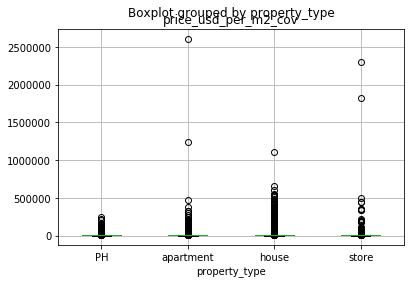

In [247]:
# Ahora veremos los Outliers en precio por typo de propiedad
df_properatti.boxplot(column='price_usd_per_m2_cov', by='property_type')

In [248]:
df_properatti.groupby('property_type')['price_usd_per_m2_cov'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4675.0,2738.437594,9330.515611,13.56668,1222.222222,1642.045455,2239.402985,248000.0
apartment,53358.0,3196.365846,14199.680603,1.00000,1800.000000,2333.333333,3058.604651,2600000.0
house,27521.0,2780.873676,17966.746349,7.46210,1073.601786,1448.828250,1900.000000,1100000.0
store,2483.0,6789.271625,63589.270517,8.30868,1095.698014,1875.000000,3333.333333,2300000.0


In [249]:
df_properatti.price_usd_per_m2_cov.describe()

count    8.803700e+04
mean     3.143497e+03
std      1.849764e+04
min      1.000000e+00
25%      1.441718e+03
50%      1.988636e+03
75%      2.747253e+03
max      2.600000e+06
Name: price_usd_per_m2_cov, dtype: float64

In [250]:
# Outlier para cada tipo de propiedad
a = (((df_properatti.price_usd_per_m2_cov[np.abs(df_properatti.price_usd_per_m2_cov) > \
        (3 * df_properatti.price_usd_per_m2_cov.std() + df_properatti.price_usd_per_m2_cov.mean())]\
       [df_properatti.property_type == 'PH'])) > 0).index

b = (((df_properatti.price_usd_per_m2_cov[np.abs(df_properatti.price_usd_per_m2_cov) > \
        (3 * df_properatti.price_usd_per_m2_cov.std() + df_properatti.price_usd_per_m2_cov.mean())]\
       [df_properatti.property_type == 'apartment'])) > 0).index

c = (((df_properatti.price_usd_per_m2_cov[np.abs(df_properatti.price_usd_per_m2_cov) > \
        (3 * df_properatti.price_usd_per_m2_cov.std() + df_properatti.price_usd_per_m2_cov.mean())]\
       [df_properatti.property_type == 'house'])) > 0).index

d = (((df_properatti.price_usd_per_m2_cov[np.abs(df_properatti.price_usd_per_m2_cov) > \
        (3 * df_properatti.price_usd_per_m2_cov.std() + df_properatti.price_usd_per_m2_cov.mean())]\
       [df_properatti.property_type == 'store'])) > 0).index

In [251]:
# Dropeo los Outlier por cada tipo de propiedad

df_properatti.drop(df_properatti.loc[a].index, inplace=True)
df_properatti.drop(df_properatti.loc[b].index, inplace=True)
df_properatti.drop(df_properatti.loc[c].index, inplace=True)
df_properatti.drop(df_properatti.loc[d].index, inplace=True)

df_properatti.shape

(87765, 20)

In [252]:
# cargo cada base nueva
df_properatti[df_properatti.property_type == 'PH'].to_csv('prop_PH.csv')
df_properatti[df_properatti.property_type == 'apartment'].to_csv('prop_apartament.csv')
df_properatti[df_properatti.property_type == 'house'].to_csv('prop_house.csv')
df_properatti[df_properatti.property_type == 'store'].to_csv('prop_store.csv')

In [253]:
df_properatti.property_type.value_counts()

apartment    53250
house        27412
PH            4648
store         2455
Name: property_type, dtype: int64

Cantidad de nulos por columna


property_type                0
barrio                       0
ciudad                       0
lon                          0
lat                          0
lat-lon                      0
geonames_id                  0
state_name                   0
lugar                        0
price_usd_per_m2_cov         0
price_aprox_usd              0
surface_covered_in_m2        0
surface_total_in_m2          0
description                  0
title                        0
price_usd_per_m2_tot         0
rooms                    32308
floor                    61398
expenses                 73816
cc_barrio_c              84219
dtype: int64






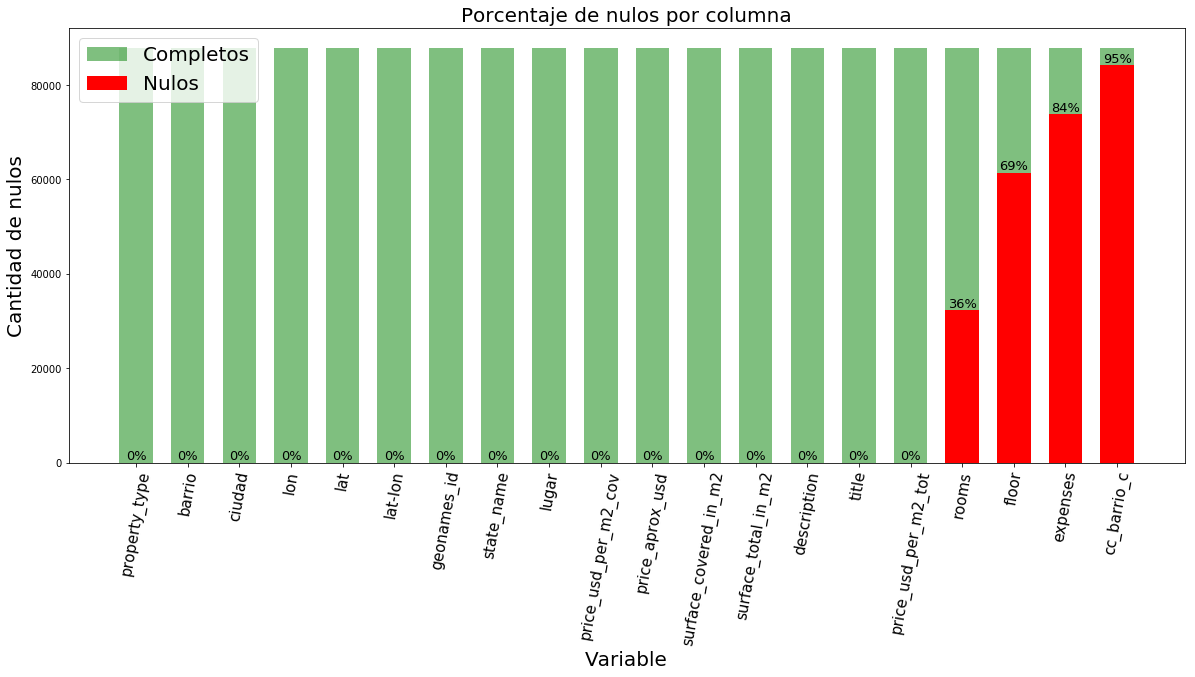

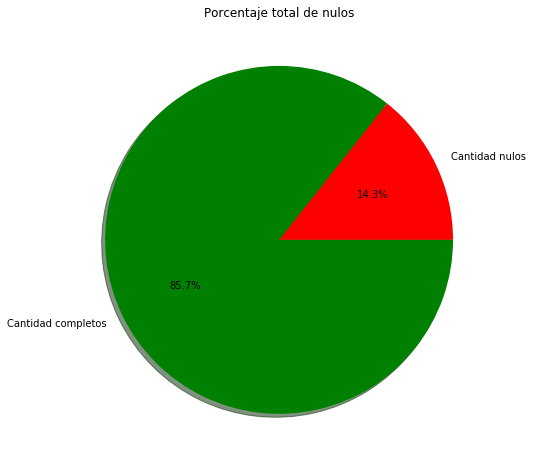

In [254]:
describe_nulls(df_properatti)